# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
train_path='/content/drive/MyDrive/0_ML_TimeSeries_Competition/train.csv'
test_path='/content/drive/MyDrive/0_ML_TimeSeries_Competition/test1.csv'
df=pd.read_csv(train_path)
tmp=dff=df=df.drop(columns='ID')
df_test=pd.read_csv(test_path)

In [3]:
def func(df):
      date_string=str(int(df['#YY']))+'-'+str(int(df['MM']))+'-'+str(int(df['DD']))+' '+str(int(df['hh']))+':'+str(int(df['mm']))
      date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
      return date_object

df['Date']=df.apply(lambda x:func(x) ,axis=1)   

In [ ]:
df.head(3)

#YY  MM  DD  hh  mm  WDIR(degT)  WSPD(m/s)  GST(m/s)  DPD(sec)  APD(sec)  \
0  2017   4  24   1  50          23        3.0       3.6      4.17      3.33   
1  2017   4  24   2  50          30        2.9       3.3      5.26      4.21   
2  2017   4  24   3  50         360        2.2       2.5      5.88      4.79   

   MWD(degT)  PRES(hPa)  ATMP(degC)  WTMP(degC)  DEWP(degC)  WVHT(m)  \
0        349     1019.1         4.7         5.1         4.2     0.39   
1        358     1018.8         4.6         4.8         4.1     0.65   
2         11     1018.3         4.6         4.7         4.2     0.90   

                 Date  
0 2017-04-24 01:50:00  
1 2017-04-24 02:50:00  
2 2017-04-24 03:50:00

# Time Series Feature Engineering

In [4]:
# Columns
cols=['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']
only=['WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']    

# Only Timeseries DATA
df=tmp[['Date','WVHT(m)']]
df=df.set_index('Date')


#LAG Features
target_variable='WVHT(m)'
df['lag_1'] = df[target_variable].shift(1)
df['lag_2'] = df[target_variable].shift(2)
df['lag_3'] = df[target_variable].shift(3)
df['lag_4'] = df[target_variable].shift(4)
df['lag_5'] = df[target_variable].shift(5)
#df['lag_6'] = df[target_variable].shift(6)
#df['lag_7'] = df[target_variable].shift(7)
#df['lag_8'] = df[target_variable].shift(8)
#df['lag_9'] = df[target_variable].shift(9)
#df['lag_10'] = df[target_variable].shift(10)



#Rolling Window Stats
#df['rolling_mean_3'] = df[target_variable].shift(1).rolling(window=3).mean()
#df['rolling_median_3'] = df[target_variable].shift(1).rolling(window=3).median()
#df['rolling_std_3'] = df[target_variable].shift(1).rolling(window=3).std()

#df['rolling_mean_4'] = df[target_variable].shift(1).rolling(window=3).mean()
#df['rolling_median_4'] = df[target_variable].shift(1).rolling(window=3).median()
#df['rolling_std_4'] = df[target_variable].shift(1).rolling(window=3).std()


#df['rolling_mean_20'] = df[target_variable].shift(1).rolling(window=20).mean()
#df['rolling_median_20'] = df[target_variable].shift(1).rolling(window=20).median()
#df['rolling_std_20'] = df[target_variable].shift(1).rolling(window=20).std()

#df['rolling_mean_30'] = df[target_variable].shift(1).rolling(window=30).mean()
#df['rolling_median_30'] = df[target_variable].shift(1).rolling(window=30).median()
#df['rolling_std_30'] = df[target_variable].shift(1).rolling(window=30).std()


#Expanding Window stats
#df['expand_lag_1']=df['lag_1'].expanding().mean()
#df['expand_lag_2']=df['lag_2'].expanding().mean()
#df['expand_lag_3']=df['lag_3'].expanding().mean()


#DD,MM,HH Features
df=pd.concat([df,dff.set_index('Date')[cols[:-1]]],axis=1)
df=df.dropna()
df=df.reset_index().drop(columns='Date')

In [ ]:
corr_=df.corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_)

### Train Data

In [5]:
all_features=list(df.columns)[1:]
#some_features=['lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_8','lag_9','lag_10']+cols[:-1]
some_features=['lag_1','lag_2','lag_3','lag_4','lag_5','lag_6']+cols[:-1]


x=df[all_features].values                              # 1............all features with rolling--------24+ features
#x=df[some_features].values                            # 2..........all features without rolling --------18 features
#x=df[cols[:-1]].values                                # 3............only original data features-------15 features


y=df['WVHT(m)'].values
print(x.shape, y.shape)

(3881, 20) (3881,)


### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["variables"] = df.columns[1:]
vif["VIF"]=[variance_inflation_factor(df.iloc[:,1:].values, i) for i in range(df.iloc[:,1:].shape[1])]
vif=vif.sort_values(by = 'VIF', ascending = False)
vif

variables           VIF
10         #YY  57564.920563
21   PRES(hPa)  55961.843578
19    APD(sec)    435.640760
14          mm    321.386927
17    GST(m/s)    296.958387
16   WSPD(m/s)    291.608312
22  ATMP(degC)    237.448512
6        lag_7    174.618248
5        lag_6    174.559289
4        lag_5    174.403483
3        lag_4    174.239795
7        lag_8    174.113782
2        lag_3    173.985359
1        lag_2    173.757101
8        lag_9    172.488971
23  WTMP(degC)    168.012108
11          MM    131.899564
18    DPD(sec)    107.534770
0        lag_1    103.620878
9       lag_10     71.373492
24  DEWP(degC)     69.051783
12          DD      6.041296
13          hh      4.079947
15  WDIR(degT)      3.842029
20   MWD(degT)      3.367070

In [ ]:
vif = pd.DataFrame()
vif["variables"] = df.columns[1:]
vif["VIF"]=[variance_inflation_factor(df.iloc[:,1:].values, i) for i in range(df.iloc[:,1:].shape[1])]
vif=vif.sort_values(by = 'VIF', ascending = False)
vif

variables           VIF
14                #YY  58421.243635
25          PRES(hPa)  56722.190291
6     rolling_mean_10   2914.110690
3      rolling_mean_7   1531.563435
7   rolling_median_10    926.476840
9      rolling_max_10    809.849490
5    rolling_median_7    487.270096
23           APD(sec)    448.975303
10     rolling_min_10    346.805494
18                 mm    330.805841
21           GST(m/s)    299.875919
20          WSPD(m/s)    294.441879
26         ATMP(degC)    240.394731
11    rolling_mean_24    218.419783
1               lag_2    182.217142
2               lag_3    173.778036
27         WTMP(degC)    169.724783
12  rolling_median_24    166.923554
15                 MM    133.866382
8      rolling_std_10    129.359739
0               lag_1    119.358173
22           DPD(sec)    108.382250
28         DEWP(degC)     70.804027
4       rolling_std_7     14.770095
13     rolling_std_24      9.215397
16                 DD      6.121927
17                 hh      4.134077
19         WDIR(degT)      3.900030
24          MWD(degT)      3.436509

### Feature selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor

In [ ]:
def Impp(model,lst):
    imp=list(model.feature_importances_.round(4))
    tp=pd.DataFrame(np.array([lst[:],imp]).T,columns=['Columns','Imp'])
    tp=tp.sort_values(by = 'Imp', ascending = False)
    print(tp)

In [ ]:
model=ExtraTreesRegressor()
model.fit(x,y)
Impp(model,df.columns[1:])    

       Columns     Imp
0        lag_1  0.4001
1        lag_2  0.2069
19    APD(sec)  0.1327
2        lag_3  0.1002
3        lag_4  0.0521
16   WSPD(m/s)   0.034
17    GST(m/s)  0.0299
4        lag_5  0.0139
5        lag_6   0.008
18    DPD(sec)  0.0055
15  WDIR(degT)  0.0014
21   PRES(hPa)  0.0014
13          hh  0.0014
20   MWD(degT)  0.0013
12          DD  0.0013
9       lag_10  0.0012
6        lag_7  0.0012
8        lag_9  0.0011
7        lag_8  0.0011
24  DEWP(degC)  0.0011
11          MM  0.0009
10         #YY  0.0009
22  ATMP(degC)  0.0009
23  WTMP(degC)  0.0009
14          mm  0.0005


In [ ]:
model2=RandomForestRegressor()
model2.fit(x,y)
Impp(model2,df.columns[1:])   

       Columns     Imp
0        lag_1  0.9362
19    APD(sec)  0.0179
17    GST(m/s)  0.0141
16   WSPD(m/s)  0.0104
1        lag_2  0.0018
2        lag_3  0.0018
15  WDIR(degT)  0.0016
3        lag_4  0.0015
21   PRES(hPa)  0.0014
4        lag_5  0.0012
20   MWD(degT)  0.0012
13          hh  0.0012
24  DEWP(degC)  0.0011
9       lag_10   0.001
5        lag_6   0.001
22  ATMP(degC)   0.001
18    DPD(sec)  0.0009
12          DD  0.0009
8        lag_9  0.0008
7        lag_8  0.0008
6        lag_7  0.0008
23  WTMP(degC)  0.0008
11          MM  0.0003
10         #YY  0.0002
14          mm  0.0001


In [ ]:
model3=LGBMRegressor()
model3.fit(x,y)
Impp(model3,df.columns[1:])   

       Columns  Imp
19    APD(sec)  482
0        lag_1  312
16   WSPD(m/s)  244
17    GST(m/s)  235
15  WDIR(degT)  158
2        lag_3  141
3        lag_4  115
20   MWD(degT)  113
1        lag_2  111
21   PRES(hPa)  109
7        lag_8   95
5        lag_6   92
9       lag_10   91
18    DPD(sec)   90
24  DEWP(degC)   83
6        lag_7   83
4        lag_5   79
13          hh   78
22  ATMP(degC)   77
8        lag_9   73
12          DD   61
23  WTMP(degC)   44
10         #YY   17
14          mm    9
11          MM    8


### Feature Extraction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

# Fit the data to the PCA model and transform the data
x_pca = pca.fit_transform(x)
print(x_pca.shape)

(3862, 10)


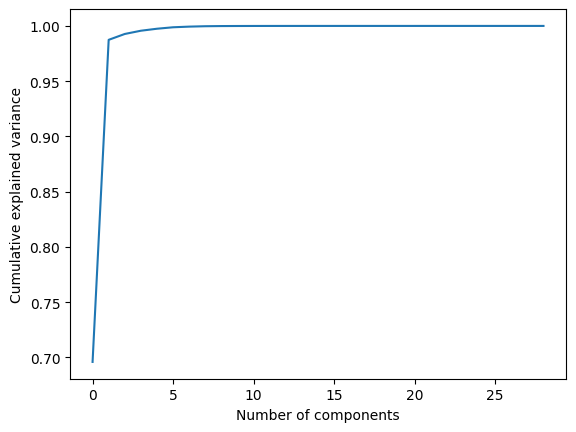

In [ ]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pca = PCA()
clf = ExtraTreesRegressor()  # some classifier of interest

pipeline = Pipeline([
    ('pca', pca),
    ('clf', clf)
])

param_grid = {
    'pca__n_components': [15,16,17,18,19,20]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(x,y)

grid_search.best_params_['pca__n_components']

18

### Transformations

In [10]:
from scipy.special import boxcox, inv_boxcox
y1= np.log(y)
y2= np.sqrt(y)
y3= boxcox(y,-1)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
x1 = scaler.fit_transform(x)
print("Standardized Data:",x1.shape)

# Normalization
normalizer = MinMaxScaler()
x2 = normalizer.fit_transform(x)
print("Normalized Data:",x2.shape)

Standardized Data: (3881, 20)
Normalized Data: (3881, 20)


# 1. ML Modelling

In [ ]:
!pip install catboost

In [7]:
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor,VotingRegressor,StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [8]:
models = [
        LinearRegression(),
        Ridge(),
        #Lasso(),
        #ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        #KNeighborsRegressor(),          #these 5 gave worst rmse=0.3
        #SVR(),
        #MLPRegressor(),
        XGBRegressor(),
        AdaBoostRegressor(), 
        GradientBoostingRegressor(), 

        ExtraTreesRegressor(),
              
        LGBMRegressor(),
              
        CatBoostRegressor(loss_function='RMSE',verbose=0)
    ]
    
def PLOT(cv_results):
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(np.mean(np.sqrt(cv_result[:])))  #take mean of only last 3 splits of each model
        cv_std.append(np.std(np.sqrt(cv_result[:])))     #take std of only last 3 splits  of each model

    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                          "Algorithm":['Liner Reg','Ridge','DT','RF','XGB','AdaBoost',
                                       'GradBoost','ExtraTrees','LGBM','CatBoost']})
    plt.figure(figsize = (6,4))
    g = sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
    g.set_xlabel("RMSE")
    g.set_title("Cross validation RMSE scores")
    total = len(cv_res)
    for p in g.patches:
        val = '{:.4f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(val, (x, y))   

def kfold_func(x,y,CV=5,transform='default'):
    n_splits = CV
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    scores=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]
        temp=[]
        for model in tqdm(models[:]):
            model.fit(xtrain,ytrain)
            ypred = model.predict(xtest)
            if transform=='default':
                score = mean_squared_error(ypred, ytest)
            elif transform=='log':
                score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
            elif transform=='sqrt':   
                score = mean_squared_error((ypred)**2,(ytest)**2)
            else:
                score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))        
            temp.append(score)
        scores.append(temp)   
        i+=1
    scores=list(np.array(scores).T)    
    return scores

def cross_val_score_ts(model,x,y,cv=5,transform='default'):
    n_splits = cv
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    temp=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        #print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]

        model.fit(xtrain,ytrain)
        ypred = model.predict(xtest)
        if transform=='default':
            score = mean_squared_error(ypred, ytest)
        elif transform=='log':
            score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
        elif transform=='sqrt':   
            score = mean_squared_error((ypred)**2,(ytest)**2)
        else:
            score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))  
        temp.append(score)
        i+=1 
    return np.array(temp)

## Compare Models

In [12]:
cv_results1=kfold_func(x1,y,5)            #containes mse for each model, split wise

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


In [13]:
cv_results2=kfold_func(x2,y,5)      

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:13<00:00,  1.36s/it]


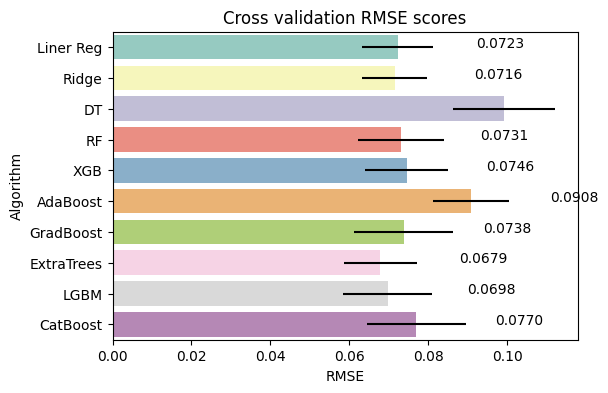

In [14]:
PLOT(cv_results1)  

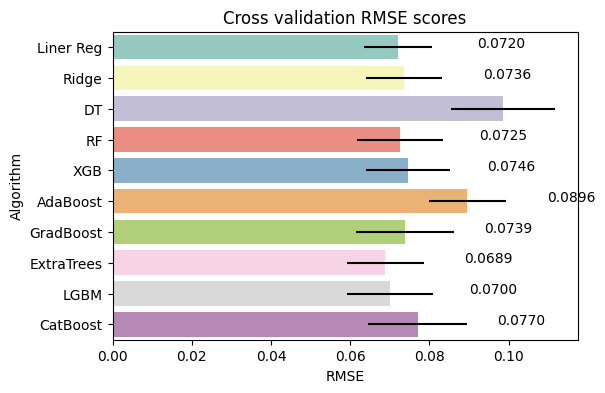

In [ ]:
PLOT(cv_results2)  

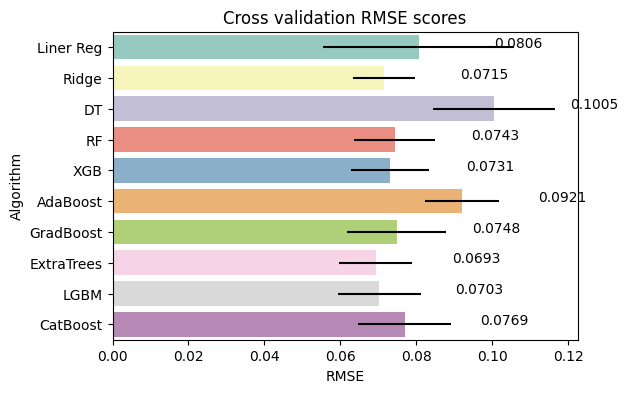

In [ ]:
PLOT(cv_results)      # 5 lags , stardardised data

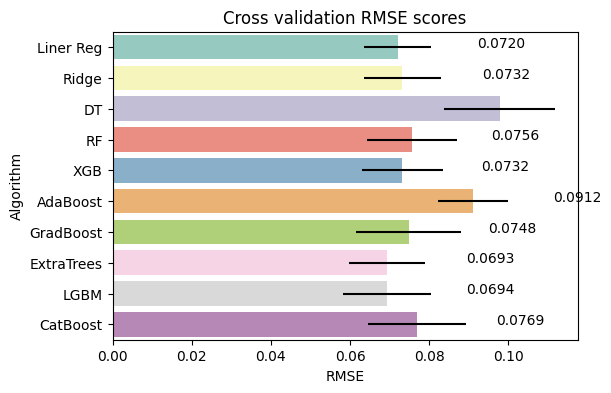

In [ ]:
PLOT(cv_results)     # 5 lags ,   normalised data

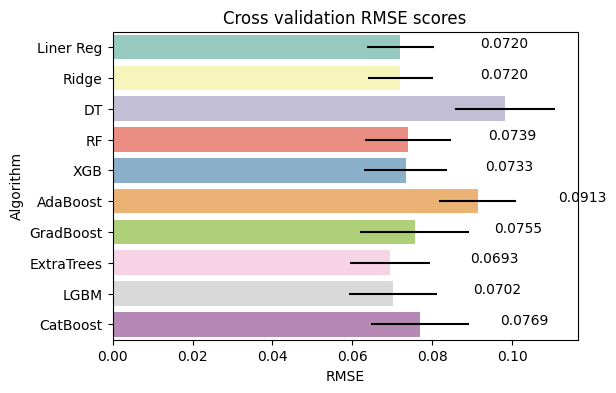

In [ ]:
PLOT(cv_results)            # 5 lag with rolling features and original features

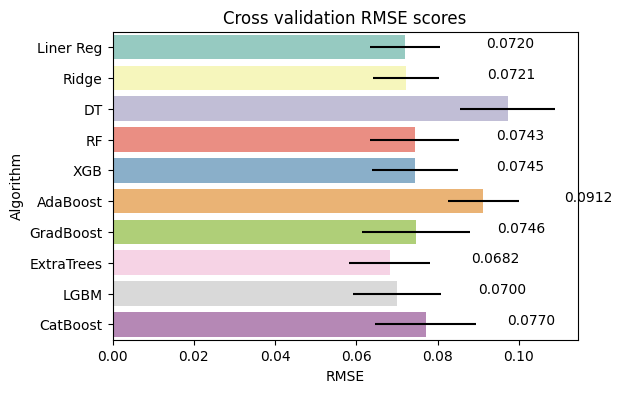

In [ ]:
PLOT(cv_results)     # 5 lag features  without rolling  ------------BEST DATA TILL NOW FOR SCORE

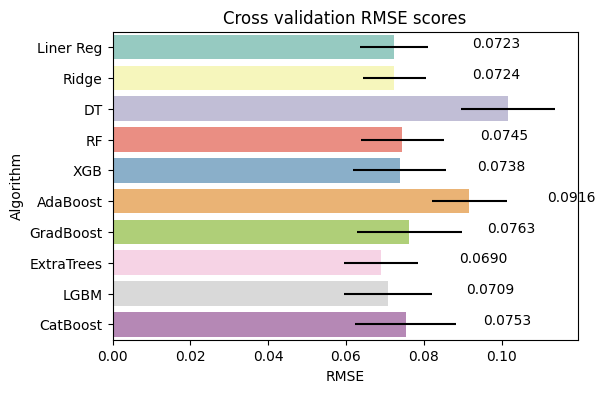

In [ ]:
PLOT(cv_results)    # 10 lag features  without rolling

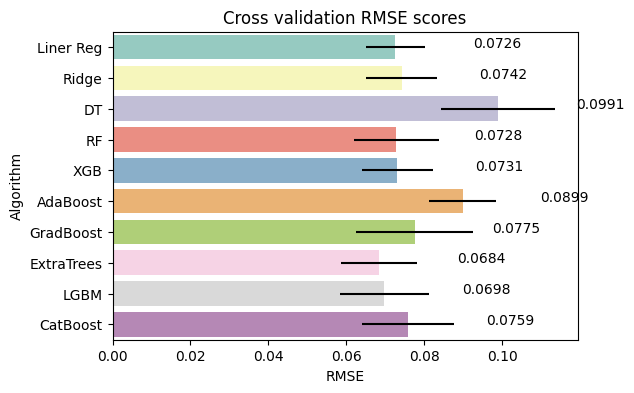

In [ ]:
PLOT(cv_results)                  #x2  ------normalisation

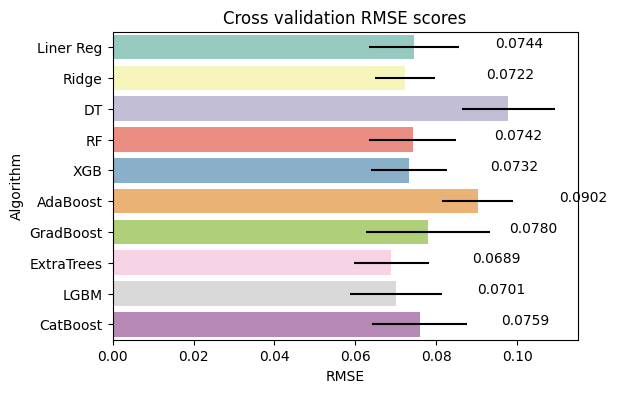

In [ ]:
PLOT(cv_results)                   #x1 ------- standardisation

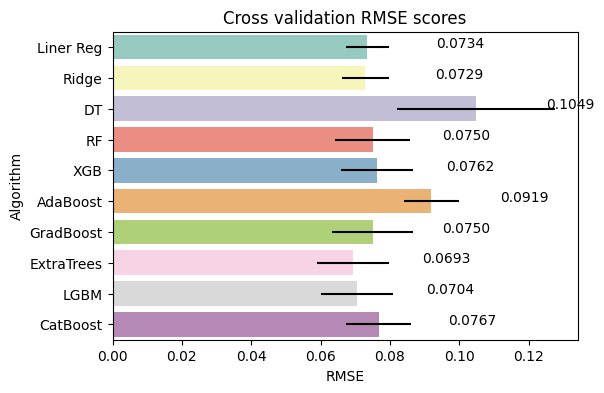

In [ ]:
PLOT(cv_results)        # 1...................all features

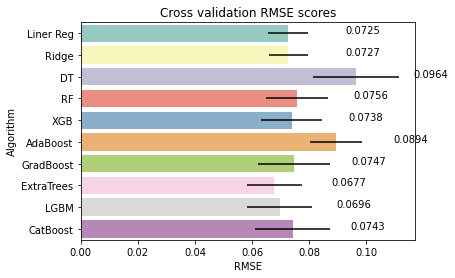

In [ ]:
PLOT(cv_results)          # 2...................all featuress without rolling 

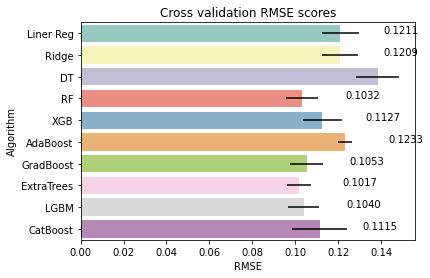

In [ ]:
PLOT(cv_results)         # 3....................only original dataset features            #WORST MODEL

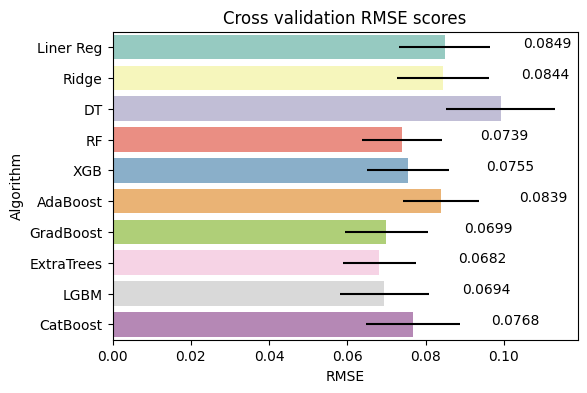

In [ ]:
PLOT(cv_results)        # 0...................sqrt transformed (y) and  all features without rolling 

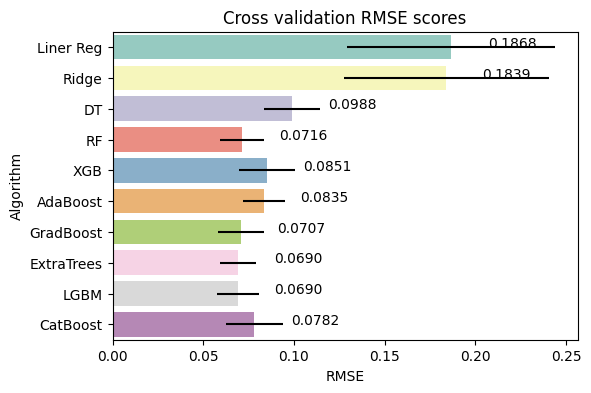

In [ ]:
PLOT(cv_results)        # 0...................log transformed (y) and  all features without rolling 

### Training Particular Model

In [16]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123,shuffle=False)
print(f"x shape = {x.shape} , y shape = {y.shape}")
print(f"xtrain shape = {xtrain.shape} , ytrain shape = {ytrain.shape}")
print(f"xtest shape = {xtest.shape} , ytest shape = {ytest.shape}")

x shape = (3881, 20) , y shape = (3881,)
xtrain shape = (3104, 20) , ytrain shape = (3104,)
xtest shape = (777, 20) , ytest shape = (777,)


In [ ]:
#model=LinearRegression()           # 9th for only rigression model---------------0.09249
model=ExtraTreesRegressor()
model.fit(x,y1)
scores1 = cross_val_score(model,x,y1, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y1, cv=5, transform='log')                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

ExtraTreesRegressor: rmse = 0.0533  rmse_ts = 0.0419


### 1. Compare Voting Ensemble Models

In [58]:
r1=CatBoostRegressor(loss_function='RMSE',verbose=0)
r2=LGBMRegressor()
#r2=LGBMRegressor(**{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 20,
#               'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8})
r3=ExtraTreesRegressor()
#r3=ExtraTreesRegressor(**{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150})
r4=GradientBoostingRegressor()
r5=XGBRegressor()
r6=RandomForestRegressor()
r7=LinearRegression()
r8= Ridge()

#r6=RandomForestRegressor(bootstrap=True, max_depth=9, max_features=0.8377008256605148, min_samples_leaf=2, min_samples_split=9, n_estimators=499),
              #these 5 gave worst rmse=0.3

r5=XGBRegressor(colsample_bytree=1.0,gamma=1e-09, learning_rate=0.028968834282299193, max_depth=10, min_child_weight=3.889391770851712,
                     n_estimators=138, reg_alpha=0.0009402119708756112, reg_lambda=2.611022260264523e-08, subsample=0.2219810196104425)
#r3=ExtraTreesRegressor(bootstrap=False, max_depth=26, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)
#r3=ExtraTreesRegressor(bootstrap=False, max_depth=47, max_features=None, min_samples_leaf=1, min_samples_split=13, n_estimators=901)
           
#r2=LGBMRegressor(colsample_bytree=1.0, learning_rate=0.055629268911040246, max_depth=10, min_child_samples=5,
#                      n_estimators=341, num_leaves=11,  reg_alpha=1e-09, reg_lambda=0.024142088612160016 ,  subsample=0.1)
#r2=LGBMRegressor(colsample_bytree=0.788253987145805, learning_rate=0.06400492748049907, max_depth=8, min_child_samples=7,
#                      n_estimators=133, num_leaves=41,  reg_alpha=1.020706429371349e-08, reg_lambda=1.5035896545851651e-06 ,  subsample=0.28132056074130923)


r1=CatBoostRegressor(verbose=0,loss_function='RMSE',bagging_temperature=10.0, colsample_bylevel=1.0, depth=1, iterations=343,
                          l2_leaf_reg=1e-09, learning_rate=0.08252508725505978, subsample=1.0) 

In [33]:
model = VotingRegressor([('Linear Reg', r7),('ridge',r8),('xgb',r5),('et',r3)])       #0.08289  with tuned et,xgb models with old data
scores1 = cross_val_score(model,x1,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x1,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0653  rmse_ts = 0.0649


In [59]:
model2 = VotingRegressor([('Linear Reg', r7),('ridge',r8),('lgbm',r2),('et',r3)])     
scores1 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model2,x,y, cv=5)                 
print(f'{model2.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0651  rmse_ts = 0.0652


In [53]:
model2 = VotingRegressor([('Linear Reg', r7),('ridge',r8),('lgbm',r2),('et',r3)])     #0.08227   with tuned et,lgbm models with old data
scores1 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model2,x,y, cv=5)                 
print(f'{model2.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0653  rmse_ts = 0.0652


In [ ]:
################################################################################
model = VotingRegressor([('Linear Reg', r7),('ridge',r8),('lgbm',r2),('et',r3)])     # 1st BEST MODEL .............0.0805 with 5 lag features withiut rolling
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0648  rmse_ts = 0.0655


In [ ]:
model = VotingRegressor([('Linear Reg', r7), ('ridge', r8),('RF',r6),('lgbm',r2)])     # 5th BEST MODEL TILL NOW------0.08357, here lgbm,rf model had previouslytuned hyperparameters
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')          # 2nd BEST MODEL TILL NOW------0.08274, without hyper para tuning 
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0654  rmse_ts = 0.0663


In [ ]:
model = VotingRegressor([('Linear Reg', r7),('lgbm',r2),('et',r3)])               # 3rd best----0.08285
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0639  rmse_ts = 0.0650


In [ ]:
model = VotingRegressor([('Linear Reg', r7),('ridge',r8),('lgbm',r2),('et',r3),('rf',r6)])    #4th best.........0.08326 
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0646  rmse_ts = 0.0655


In [ ]:
model = VotingRegressor([('Linear Reg', r7), ('ET', r3),('RF',r6),('lgbm',r2)])    # 6th ---------0.08512
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0642  rmse_ts = 0.0657


In [ ]:
model = VotingRegressor([('ridge', r8), ('ET', r3),('RF',r6),('lgbm',r2)])    # 7th-----------0.08513
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0642  rmse_ts = 0.0657


In [ ]:
model = VotingRegressor([('LGBM', r2), ('ET', r3)])                                # 8th ----------0.08916
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0651  rmse_ts = 0.0663


In [ ]:
model = VotingRegressor([('Linear Reg', r7), ('ridge', r8)])                      # 10th very slight worse than simple reg------------0.09269
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0747  rmse_ts = 0.0726


### 2. Compare Stacking Ensemble Models

In [50]:
r1=CatBoostRegressor()
r2=LGBMRegressor()
r3=ExtraTreesRegressor()
r4=GradientBoostingRegressor()
r5=XGBRegressor()
r6=RandomForestRegressor()
r7=LinearRegression()
r8= Ridge()

In [ ]:
estimators = [('ridge',r8),('lgbm',r2),('et',r3)]

stk= StackingRegressor(estimators=estimators,  final_estimator=r7)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

StackingRegressor: rmse = 0.0638  rmse_ts = 0.0651


In [ ]:
estimators = [('linear',r7),('ridge',r8),('lgbm',r2),('et',r3)]

stk= StackingRegressor(estimators=estimators)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

StackingRegressor: rmse = 0.0638  rmse_ts = 0.0650


In [ ]:
estimators = [('linear',r7),('ridge',r8),('lgbm',r2),('et',r3)]          # stacking best.............0.0823

stk= StackingRegressor(estimators=estimators, final_estimator=r6)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

StackingRegressor: rmse = 0.0639  rmse_ts = 0.0649


In [51]:
estimators = [('linear',r7),('ridge',r8),('lgbm',r2),('et',r3)]         

stk= StackingRegressor(estimators=estimators, final_estimator=r6)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

StackingRegressor: rmse = 0.0656  rmse_ts = 0.0650


In [ ]:
estimators = [('linear',r7),('ridge',r8),('et',r3)]

stk= StackingRegressor(estimators=estimators, final_estimator=r2)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

StackingRegressor: rmse = 0.0638  rmse_ts = 0.0650


In [ ]:
estimators = [('linear',r7),('ridge',r8),('lgbm',r2)]

stk= StackingRegressor(estimators=estimators, final_estimator=r3)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

StackingRegressor: rmse = 0.0637  rmse_ts = 0.0651


### 3. Predict

In [61]:
model2.fit(x,y)

VotingRegressor(estimators=[('Linear Reg', LinearRegression()),
                            ('ridge', Ridge()), ('lgbm', LGBMRegressor()),
                            ('et', ExtraTreesRegressor())])

In [69]:
def predict(model,df,df_test):
    result=[]
    target_variable='WVHT(m)'
    total_length=3886-5         # subtract with max lag/roll shift
    cols=['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']

    for i in tqdm(range(total_length,len(df)+len(df_test))):
        ind=i-total_length
        """
        d={'lag_1':df['WVHT(m)'].iloc[i-1],'lag_2':df['WVHT(m)'].iloc[i-2],'lag_3':df['WVHT(m)'].iloc[i-3],'lag_4':df['WVHT(m)'].iloc[i-4]
           ,'lag_5':df['WVHT(m)'].iloc[i-5],
           'rolling_mean_6':df[target_variable].shift(1).rolling(window=6).mean().iloc[i], 
           'rolling_median_6': df[target_variable].shift(1).rolling(window=6).median().iloc[i-1],
           'rolling_std_6': df[target_variable].shift(1).rolling(window=6).std().iloc[i-1],
           'rolling_mean_7': df[target_variable].shift(1).rolling(window=7).mean().iloc[i-1],
           'rolling_median_7': df[target_variable].shift(1).rolling(window=7).median().iloc[i-1],
           'rolling_std_7': df[target_variable].shift(1).rolling(window=7).std().iloc[i-1]
           }
        
        """
        d={'lag_1':df['WVHT(m)'].iloc[i-1],'lag_2':df['WVHT(m)'].iloc[i-2],'lag_3':df['WVHT(m)'].iloc[i-3],'lag_4':df['WVHT(m)'].iloc[i-4]
           ,'lag_5':df['WVHT(m)'].iloc[i-5]}


        """   
        d={'lag_1':df['WVHT(m)'].iloc[i-1],'lag_2':df['WVHT(m)'].iloc[i-2],'lag_3':df['WVHT(m)'].iloc[i-3],'lag_4':df['WVHT(m)'].iloc[i-4]
           ,'lag_5':df['WVHT(m)'].iloc[i-5],'lag_6':df['WVHT(m)'].iloc[i-6],'lag_7':df['WVHT(m)'].iloc[i-7],'lag_8':df['WVHT(m)'].iloc[i-8],
           'lag_9':df['WVHT(m)'].iloc[i-9],'lag_10':df['WVHT(m)'].iloc[i-10]}
        """
        
        #d={'lag_1':df['WVHT(m)'].iloc[i-1],'lag_2':df['WVHT(m)'].iloc[i-2],'lag_3':df['WVHT(m)'].iloc[i-3]}
        #d={'lag_1':df[target_variable].shift(1).iloc[i],'lag_2':df[target_variable].shift(2).iloc[i],'lag_3':df[target_variable].shift(3).iloc[i]}

        for col in cols[:-1]:
            d[col]=df_test[col].iloc[ind]  
        X=(np.array(list(d.values())).reshape(-1,df_predict.shape[1]-1))        #df_predict also contains target column so contains either 18+1=19 columns or 26+1=27
       
        wvht=model.predict(X)    
        result.append(wvht)
        d['WVHT(m)']=wvht
        df=df.append(d, ignore_index=True)

        if i%5==0:
            x=df.iloc[:,1:].values
            y=df['WVHT(m)'].values
            model.fit(x,y)
        i+=1
    return np.array(result)
    

In [70]:
df_predict=df
#df_predict['WVHT(m)']=np.log(df_predict['WVHT(m)'])       #............dont forget to transform the y variable here also
ypred=predict(model2,df_predict,df_test)

100%|██████████| 1535/1535 [17:09<00:00,  1.49it/s]


In [71]:
ypred

array([[0.27714009],
       [0.23852836],
       [0.2352238 ],
       ...,
       [0.45563062],
       [0.69254794],
       [0.94632339]])

In [72]:
def form_csv(df_test,y_pred):
    s=pd.Series(y_pred,name='WVHT(m)')
    dff=pd.concat([df_test['ID'],s],axis=1).set_index('ID')
    dff.to_csv('submit5.csv')  
form_csv(df_test,ypred.reshape(-1))      

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(ypred, label='predicted',color='r')
plt.plot(ytest, label='test', color='b')
plt.title('Test Vs Predicted')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
df.columns

Index(['WVHT(m)', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'rolling_mean_6', 'rolling_median_6', 'rolling_std_6', 'rolling_mean_7',
       'rolling_median_7', 'rolling_std_7', '#YY', 'MM', 'DD', 'hh', 'mm',
       'WDIR(degT)', 'WSPD(m/s)', 'GST(m/s)', 'DPD(sec)', 'APD(sec)',
       'MWD(degT)', 'PRES(hPa)', 'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)'],
      dtype='object')

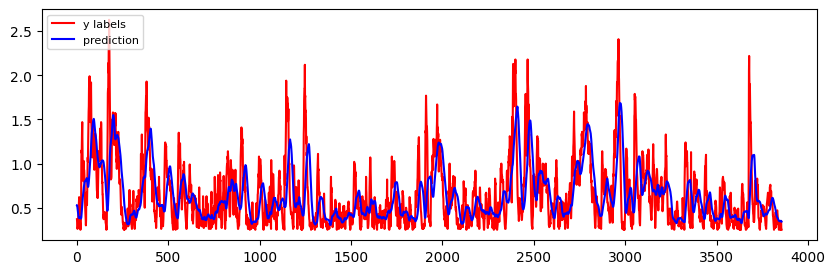

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(y, label='y labels',color='r')
plt.plot(df['rolling_mean_30'], label='prediction',color='b')   # log transformed
plt.legend(loc='upper left', fontsize=8)
plt.show()

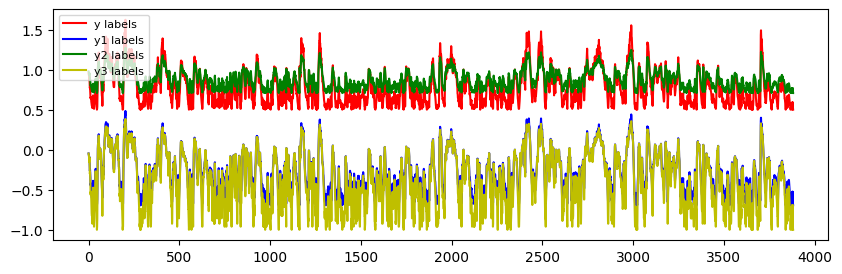

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(y, label='y labels',color='r')
plt.plot(y1, label='y1 labels',color='b')   # log transformed
plt.plot(y2, label='y2 labels',color='g')   # sqrt transformed
plt.plot(y3, label='y3 labels',color='y')   # boxcox transformed
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Hyper Parameter Tuning

### 1. Using GridsearchCV

In [ ]:
model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {'learning_rate': [0.02, 0.01,0.005],
              'n_estimators': [80,100,150,200],
              'max_depth': [3, 4, 5],
              'max_features' : list(range(6,x.shape[1]))}


# Define the GridSearchCV object
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

gs.fit(x,y)
# Print the best hyperparameters
print(gs.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
{'learning_rate': 0.02, 'max_depth': 5, 'max_features': 9, 'n_estimators': 200}


In [ ]:
model2 = LGBMRegressor()
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 30, 50],
    'reg_alpha': [0, 1e-1, 1, 2],
    'reg_lambda': [0, 1e-1, 1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

lgbm = LGBMRegressor()
gs2 = GridSearchCV(lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
gs2.fit(x,y)
print(gs2.best_params_)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
gs3 = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
gs3.fit(x, y)
print(gs3.best_params_)

{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create the ExtraTreesRegressor object
et = ExtraTreesRegressor()

# Create the GridSearchCV object
gs4 = GridSearchCV(et, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gs4.fit(x, y)
print(gs4.best_params_)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
}

xgb = XGBRegressor()

# Create the GridSearchCV object
gs5 = GridSearchCV(xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gs5.fit(x, y)
print(gs5.best_params_)

### 2. Using BayesearchCV

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 200),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', None])
}
model = GradientBoostingRegressor()

bayes_cv = BayesSearchCV(model,search_space,n_iter=50,scoring='neg_mean_squared_error',cv=5)
bayes_cv.fit(x, y)
print("Best Score: ", bayes_cv.best_score_)
print("Best Parameters: ", bayes_cv.best_params_)

Best Score:  -0.0046520513952607225
Best Parameters:  OrderedDict([('learning_rate', 0.22231509235692853), ('max_depth', 3), ('max_features', None), ('min_samples_leaf', 9), ('min_samples_split', 9), ('n_estimators', 119)])


In [ ]:
search_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False])
}
et_model = ExtraTreesRegressor()

bayes_cv1 = BayesSearchCV(et_model,search_space,n_iter=50,scoring='neg_mean_squared_error',cv=5)
bayes_cv1.fit(x, y)
print("Best Score: ", bayes_cv1.best_score_)
print("Best Parameters: ", bayes_cv1.best_params_)

Best Score:  -0.004398404994233054
Best Parameters:  OrderedDict([('bootstrap', False), ('max_depth', 26), ('max_features', None), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])


In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'min_child_weight': Real(1, 10),
    'subsample': Real(0.1, 1.0, prior='log-uniform'),
    'colsample_bytree': Real(0.1, 1.0, prior='log-uniform'),
    'reg_alpha': Real(1e-9, 100, prior='log-uniform'),
    'reg_lambda': Real(1e-9, 100, prior='log-uniform'),
    'gamma': Real(1e-9, 100, prior='log-uniform')
}

xgb_model = XGBRegressor()

bayes_cv2 = BayesSearchCV(xgb_model, search_space, n_iter=50, scoring='neg_mean_squared_error',cv=5)
bayes_cv2.fit(x, y)
print("Best Score: ", bayes_cv2.best_score_)
print("Best Parameters: ", bayes_cv2.best_params_)

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'iterations': Integer(50, 500),
    'depth': Integer(1, 10),
    'l2_leaf_reg': Real(1e-9, 100, prior='log-uniform'),
    'subsample': Real(0.1, 1.0, prior='log-uniform'),
    'colsample_bylevel': Real(0.1, 1.0, prior='log-uniform'),
    'bagging_temperature': Real(0.0, 10.0),
}

cat_model = CatBoostRegressor(loss_function='RMSE',verbose=0)
bayes_cv3 = BayesSearchCV(cat_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv3.fit(x, y)
print("Best Score: ", bayes_cv3.best_score_)
print("Best Parameters: ", bayes_cv3.best_params_)

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'num_leaves': Integer(2, 50),
    'subsample': Real(0.1, 1.0, prior='log-uniform'),
    'colsample_bytree': Real(0.1, 1.0, prior='log-uniform'),
    'reg_alpha': Real(1e-9, 100, prior='log-uniform'),
    'reg_lambda': Real(1e-9, 100, prior='log-uniform'),
    'min_child_samples': Integer(5, 50)
}

# Create the LightGBM model
lgb_model = LGBMRegressor()
bayes_cv4 = BayesSearchCV(lgb_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv4.fit(x, y)
print("Best Score: ", bayes_cv4.best_score_)
print("Best Parameters: ", bayes_cv4.best_params_)

In [ ]:
search_space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0, prior='log-uniform'),
    'bootstrap': [True, False]
}
rf_model = RandomForestRegressor()
bayes_cv5 = BayesSearchCV(rf_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv5.fit(x, y)
print("Best Score: ", bayes_cv5.best_score_)
print("Best Parameters: ", bayes_cv5.best_params_)

Best Score:  -0.0047064198797236514
Best Parameters:  OrderedDict([('bootstrap', True), ('max_depth', 9), ('max_features', 0.8377008256605148), ('min_samples_leaf', 2), ('min_samples_split', 9), ('n_estimators', 499)])


In [ ]:
search_space = {
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'loss': ['linear', 'square', 'exponential']
}
ada_model = AdaBoostRegressor()
bayes_cv6 = BayesSearchCV(ada_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=5)
bayes_cv6.fit(x, y)
print("Best Score: ", bayes_cv6.best_score_)
print("Best Parameters: ", bayes_cv6.best_params_)

## Hyper Parameter Tuned Modelling

In [24]:
def kfold_func_grid(x,y,CV=5,transform='default'):
    models = [
        LinearRegression(),
        Ridge(),
        #Lasso(),
        #ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(**{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}),
        #KNeighborsRegressor(),          #these 5 gave worst rmse=0.3
        #SVR(),
        #MLPRegressor(),
        XGBRegressor(**{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}),
        AdaBoostRegressor(), 
        GradientBoostingRegressor(**{'learning_rate': 0.02, 'max_depth': 5, 'max_features': 9, 'n_estimators': 200}), 

        ExtraTreesRegressor(**{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}),
        #{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}  
              
        LGBMRegressor(**{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_samples': 20,
               'n_estimators': 300, 'num_leaves': 31, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8}),
             
        CatBoostRegressor(**{'loss_function':'RMSE','verbose':0,'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}) 
    ]

    n_splits = CV
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    scores=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]
        temp=[]
        for model in tqdm(models[:]):
            model.fit(xtrain,ytrain)
            ypred = model.predict(xtest)
            if transform=='default':
                score = mean_squared_error(ypred, ytest)
            elif transform=='log':
                score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
            elif transform=='sqrt':   
                score = mean_squared_error((ypred)**2,(ytest)**2)
            else:
                score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))        
            temp.append(score) 
        scores.append(temp)   
        i+=1
    scores=list(np.array(scores).T)    
    return scores

def kfold_func_bayes(x,y,CV=5,transform='default'):
    models = [
        LinearRegression(),
        Ridge(),
        #Lasso(),
        #ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(bootstrap=True, max_depth=9, max_features=0.8377008256605148, min_samples_leaf=2, min_samples_split=9, n_estimators=499),
        #KNeighborsRegressor(),          #these 5 gave worst rmse=0.3
        #SVR(),
        #MLPRegressor(),
        XGBRegressor(colsample_bytree=1.0,gamma=1e-09, learning_rate=0.028968834282299193, max_depth=10, min_child_weight=3.889391770851712, 
                     n_estimators=138, reg_alpha=0.0009402119708756112, reg_lambda=2.611022260264523e-08, subsample=0.2219810196104425),
        AdaBoostRegressor(learning_rate=0.06973419416032468, loss='exponential', n_estimators=386), 
        GradientBoostingRegressor(learning_rate=0.22231509235692853,max_depth=3,max_features= None, min_samples_leaf=9, min_samples_split=9, n_estimators=119), 

        ExtraTreesRegressor(bootstrap=False, max_depth=26, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000),
        #{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}  
              
        LGBMRegressor(colsample_bytree=1.0, learning_rate=0.055629268911040246, max_depth=10, min_child_samples=5,
                      n_estimators=341, num_leaves=11,  reg_alpha=1e-09, reg_lambda=0.024142088612160016 ,  subsample=0.1),
             
        CatBoostRegressor(verbose=0,loss_function='RMSE',bagging_temperature=10.0, colsample_bylevel=1.0, depth=1, iterations=343,
                          l2_leaf_reg=1e-09, learning_rate=0.08252508725505978, subsample=1.0) 
    ]

    n_splits = CV
    tscv = TimeSeriesSplit(n_splits=n_splits)   # Initialize TimeSeriesSplit
    scores=[]
    i=1
    for train_index, test_index in tscv.split(x):     # Loop through splits
        print(f'Split={i} , Train length={len(train_index)} Test Length={len(test_index)}')
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest=y[train_index],y[test_index]
        temp=[]
        for model in tqdm(models[:]):
            model.fit(xtrain,ytrain)
            ypred = model.predict(xtest)
            if transform=='default':
                score = mean_squared_error(ypred, ytest)
            elif transform=='log':
                score = mean_squared_error(np.exp(ypred), np.exp(ytest))  
            elif transform=='sqrt':   
                score = mean_squared_error((ypred)**2,(ytest)**2)
            else:
                score = mean_squared_error(inv_boxcox(ypred,-1),inv_boxcox(ytest,-1))        
            temp.append(score) 
        scores.append(temp)   
        i+=1
    scores=list(np.array(scores).T)    
    return scores    

In [25]:
cv_results=kfold_func_grid(x,y,CV=5)   

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:03<00:00,  3.07it/s]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


In [26]:
cv_results2=kfold_func_bayes(x,y,CV=5)   

Split=1 , Train length=651 Test Length=646


100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Split=2 , Train length=1297 Test Length=646


100%|██████████| 10/10 [00:25<00:00,  2.55s/it]


Split=3 , Train length=1943 Test Length=646


100%|██████████| 10/10 [00:27<00:00,  2.76s/it]


Split=4 , Train length=2589 Test Length=646


100%|██████████| 10/10 [00:30<00:00,  3.07s/it]


Split=5 , Train length=3235 Test Length=646


100%|██████████| 10/10 [00:37<00:00,  3.71s/it]


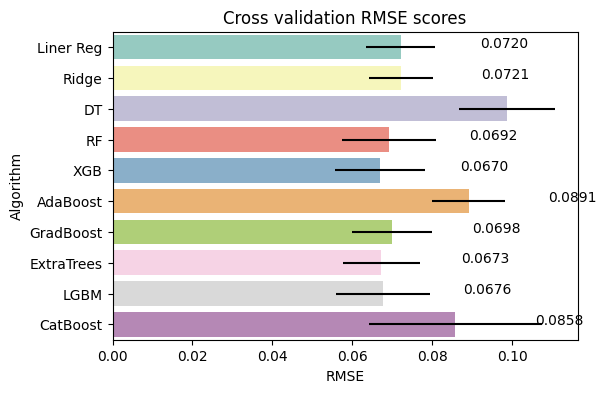

In [27]:
PLOT(cv_results2)     #bayes search cv

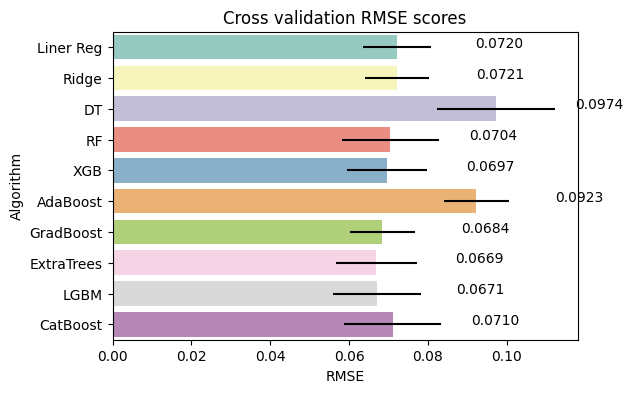

In [28]:
PLOT(cv_results)  #grid search cv

In [ ]:
r1=ExtraTreesRegressor(**{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150})
r2=GradientBoostingRegressor(learning_rate=0.22231509235692853,max_depth=3,max_features= None, min_samples_leaf=9, min_samples_split=9, n_estimators=119)
r3=XGBRegressor(colsample_bytree=1.0,gamma=1e-09, learning_rate=0.028968834282299193, max_depth=10, min_child_weight=3.889391770851712, 
                     n_estimators=138, reg_alpha=0.0009402119708756112, reg_lambda=2.611022260264523e-08, subsample=0.2219810196104425)

r4=LGBMRegressor(colsample_bytree=1.0, learning_rate=0.055629268911040246, max_depth=10, min_child_samples=5,
                      n_estimators=341, num_leaves=11,  reg_alpha=1e-09, reg_lambda=0.024142088612160016 ,  subsample=0.1)

r5=RandomForestRegressor(bootstrap=True, max_depth=9, max_features=0.8377008256605148, min_samples_leaf=2, min_samples_split=9, n_estimators=499)

r6=CatBoostRegressor(verbose=0,loss_function='RMSE',bagging_temperature=10.0, colsample_bylevel=1.0, depth=1, iterations=343,
                          l2_leaf_reg=1e-09, learning_rate=0.08252508725505978, subsample=1.0) 

r7=LinearRegression()
r8=Ridge()

### 1. Comparing Voting

In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2)])                                             #.............0.09139
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0649  rmse_ts = 0.0659


In [ ]:
model2 = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('linear',r7)])                  #............0.08657 ..........worked BEST compared to others in this set
scores1 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model2,x,y, cv=5)                 
print(f'{model2.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0637  rmse_ts = 0.0642


In [ ]:
model = VotingRegressor([('lgbm', r3),('gbm',r2)])     
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0654  rmse_ts = 0.0665


In [ ]:
model2 = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3)])                      #.........0.09322
scores1 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model2,x,y, cv=5)                 
print(f'{model2.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0646  rmse_ts = 0.0654


In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('lgbm',r4)])          #............. 0.09375
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0645  rmse_ts = 0.0653


In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('lgbm',r4),('rf',r5)])     
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0648  rmse_ts = 0.0656


In [ ]:
model = VotingRegressor([('ET', r1),('gbm',r2),('xgb',r3),('rf',r5)])     
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{model.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse = 0.0650  rmse_ts = 0.0660


In [ ]:
model2.fit(x,y)

VotingRegressor(estimators=[('ET',
                             ExtraTreesRegressor(max_depth=40,
                                                 max_features='auto',
                                                 min_samples_leaf=2,
                                                 min_samples_split=5,
                                                 n_estimators=150)),
                            ('gbm',
                             GradientBoostingRegressor(learning_rate=0.22231509235692853,
                                                       min_samples_leaf=9,
                                                       min_samples_split=9,
                                                       n_estimators=119)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_byleve...
                                          interaction_constraints=None,
                                          learning_rate=0.028968834282299193,
                                          max_bin=None, max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=3.889391770851712,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=138, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('linear', LinearRegression())])

### 2. Comparing Stacking

In [ ]:
estimators = [('linear',r7),('ridge',r8),('lgbm',r2),('et',r1)]          

stk= StackingRegressor(estimators=estimators, final_estimator=r6)
scores1 = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')    
scores2 = cross_val_score_ts(model,x,y, cv=5)                 
print(f'{stk.__class__.__name__}: rmse = {np.mean(np.sqrt(np.abs(scores1))):.4f}  rmse_ts = {np.mean(np.sqrt(np.abs(scores2))):.4f}')

### 3. Predict

In [ ]:
def predict(model,df,df_test):
    result=[]
    target_variable='WVHT(m)'
    total_length=3886-3         #subtracted with 24 because we had used rolling mean with 24 for creating features
    for i in tqdm(range(total_length,len(df)+len(df_test))):
        ind=i-total_length
        d={'lag_1':df['WVHT(m)'].iloc[i-1],'lag_2':df['WVHT(m)'].iloc[i-2],'lag_3':df['WVHT(m)'].iloc[i-3]}
        #d={'lag_1':df[target_variable].shift(1).iloc[i],'lag_2':df[target_variable].shift(2).iloc[i],'lag_3':df[target_variable].shift(3).iloc[i]}

        for col in cols[:-1]:
            d[col]=df_test[col].iloc[ind]  
        X=np.array(list(d.values())).reshape(-1,df_predict.shape[1]-1)        #df_predict also contains target column so contains either 18+1=19 columns or 26+1=27
        wvht=model.predict(X)    
        result.append(wvht)
        d['WVHT(m)']=wvht
        df=df.append(d, ignore_index=True)
        #x=df[features].values
        #y=df['WVHT(m)'].values
        #model.fit(x,y)
        i+=1
    return np.array(result)

df_predict=df[some_features+['WVHT(m)']]
#df_predict['WVHT(m)']=np.log(df_predict['WVHT(m)'])       #............dont forget to transform the y variable here also
ypred=predict(model2,df_predict,df_test)

100%|██████████| 1535/1535 [00:52<00:00, 29.33it/s]


In [ ]:
def form_csv(df_test,y_pred):
    s=pd.Series(y_pred,name='WVHT(m)')
    dff=pd.concat([df_test['ID'],s],axis=1).set_index('ID')
    dff.to_csv('submit5.csv')  
form_csv(df_test,ypred.reshape(-1)) 

# 2. LSTM Modelling

In [ ]:
import torch
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
def build_3d_tensor(df,window_size=5):
    X = []
    Y = []
    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i+window_size,1:])
        Y.append(df.iloc[i+window_size,0])
    X=np.array(X)
    Y=np.array(Y)
    return X,Y

In [ ]:
x,y=build_3d_tensor(df)    #Build 3D Tensor for LSTM Model
print(x.shape,y.shape)

(3878, 5, 18) (3878,)


#### 1.Tensorflow Model

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(5, 18),return_sequences=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128))
model.add(Dense(512,'relu'))
model.add(Dense(512,'relu'))
model.add(Dense(256,'relu'))
model.add(Dense(128,'relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 5, 32)             6528      
                                                                 
 lstm_37 (LSTM)              (None, 5, 64)             24832     
                                                                 
 lstm_38 (LSTM)              (None, 5, 128)            98816     
                                                                 
 lstm_39 (LSTM)              (None, 128)               131584    
                                                                 
 dense_35 (Dense)            (None, 512)               66048     
                                                                 
 dense_36 (Dense)            (None, 512)               262656    
                                                                 
 dense_37 (Dense)            (None, 256)             

In [ ]:
model.fit(x, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
97/97 [==============================] - 8s 85ms/step - loss: 0.0460 - val_loss: 0.0428
Epoch 2/50
97/97 [==============================] - 6s 64ms/step - loss: 0.0389 - val_loss: 0.0469
Epoch 3/50
97/97 [==============================] - 5s 54ms/step - loss: 0.0331 - val_loss: 0.0322
Epoch 4/50
97/97 [==============================] - 4s 42ms/step - loss: 0.0308 - val_loss: 0.0426
Epoch 5/50
97/97 [==============================] - 5s 49ms/step - loss: 0.0332 - val_loss: 0.0403
Epoch 6/50
97/97 [==============================] - 6s 57ms/step - loss: 0.0365 - val_loss: 0.0484
Epoch 7/50
97/97 [==============================] - 4s 42ms/step - loss: 0.0372 - val_loss: 0.0318
Epoch 8/50
97/97 [==============================] - 5s 51ms/step - loss: 0.0298 - val_loss: 0.0354
Epoch 9/50
97/97 [==============================] - 8s 79ms/step - loss: 0.0301 - val_loss: 0.0371
Epoch 10/50
97/97 [==============================] - 4s 42ms/step - loss: 0.0312 - val_loss: 0.0327
Epoch 11/

#### 2.Pytorch Model

In [ ]:
x,y=torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123,shuffle=False)
print(f"x shape = {x.shape} , y shape = {y.shape}")
print(f"xtrain shape = {xtrain.shape} , y shape = {ytrain.shape}")
print(f"xtest shape = {xtest.shape} , y shape = {ytest.shape}")

x shape = torch.Size([3878, 5, 3]) , y shape = torch.Size([3878])
xtrain shape = torch.Size([3102, 5, 3]) , y shape = torch.Size([3102])
xtest shape = torch.Size([776, 5, 3]) , y shape = torch.Size([776])


In [ ]:
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, 2*hidden_size, batch_first=True)
        self.lstm3 = nn.LSTM(2*hidden_size, 4*hidden_size, batch_first=True)
        self.fc1 = nn.Linear(4*hidden_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, output_size)

    def forward(self, x):
        out,_ = self.lstm1(x)
        out,_ = self.lstm2(out)
        out,_ = self.lstm3(out)
        out = F.relu(self.fc1(out[:, -1, :]))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.fc4(out)
        return out

model2 = LSTM_Model(input_size=3, hidden_size=32, output_size=1)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters())

# Train the model
num_epochs = 20
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(xtrain), batch_size):
        # Get batch of data
        X_batch = xtrain[i:i+batch_size]
        y_batch = ytrain[i:i+batch_size]

        # Forward pass
        ypred = model2(X_batch)

        # Compute loss
        loss = criterion(ypred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        ypred = model2(xtest)
        test_loss = criterion(ypred, ytest)    

    # Print loss for this epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Train RMSE Loss: {(loss.item()):.4f} Test RMSE Loss: {(test_loss.item()):.4f}')

Epoch [1/20], Train RMSE Loss: 0.3282 Test RMSE Loss: 0.1017
Epoch [2/20], Train RMSE Loss: 0.3283 Test RMSE Loss: 0.1017
Epoch [3/20], Train RMSE Loss: 0.3264 Test RMSE Loss: 0.1003
Epoch [4/20], Train RMSE Loss: 0.3277 Test RMSE Loss: 0.1016
Epoch [5/20], Train RMSE Loss: 0.3277 Test RMSE Loss: 0.1016
Epoch [6/20], Train RMSE Loss: 0.3275 Test RMSE Loss: 0.1017
Epoch [7/20], Train RMSE Loss: 0.3274 Test RMSE Loss: 0.1018
Epoch [8/20], Train RMSE Loss: 0.3271 Test RMSE Loss: 0.1019
Epoch [9/20], Train RMSE Loss: 0.3270 Test RMSE Loss: 0.1021
Epoch [10/20], Train RMSE Loss: 0.3268 Test RMSE Loss: 0.1023
Epoch [11/20], Train RMSE Loss: 0.3266 Test RMSE Loss: 0.1025
Epoch [12/20], Train RMSE Loss: 0.3264 Test RMSE Loss: 0.1027
Epoch [13/20], Train RMSE Loss: 0.3263 Test RMSE Loss: 0.1029
Epoch [14/20], Train RMSE Loss: 0.3261 Test RMSE Loss: 0.1031
Epoch [15/20], Train RMSE Loss: 0.3258 Test RMSE Loss: 0.1033
Epoch [16/20], Train RMSE Loss: 0.3256 Test RMSE Loss: 0.1036
Epoch [17/20], Tr

# 3. Arima Modelling

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
"""
range=np.array(df['Date'])
data=df['WVHT(m)'].values
ts = pd.Series(data, index=range)
result = seasonal_decompose(ts, model='additive',period = len(df))
"""

In [ ]:
result=adfuller(dff)
print('ADF Statistic: %f' % result[0])          #its stationary data
print('p-value: %f' % result[1])

# After Differencing 1 times
result_diff = adfuller(dff.diff().dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -11.456206
p-value: 0.000000
ADF Statistic: -16.775590
p-value: 0.000000


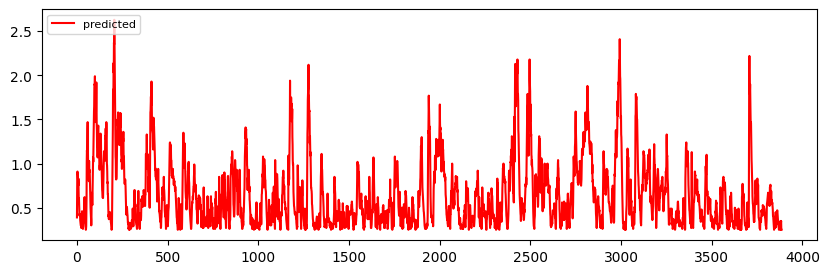

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(dff['WVHT(m)'], label='predicted',color='r')                     
plt.legend(loc='upper left', fontsize=8)
plt.show()

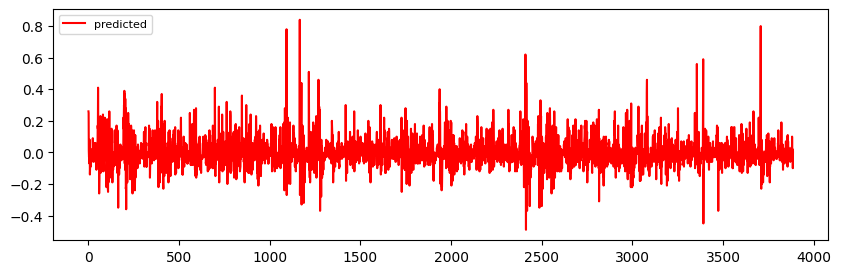

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(dff['WVHT(m)'].diff(), label='predicted',color='r')
plt.legend(loc='upper left', fontsize=8)
plt.show()

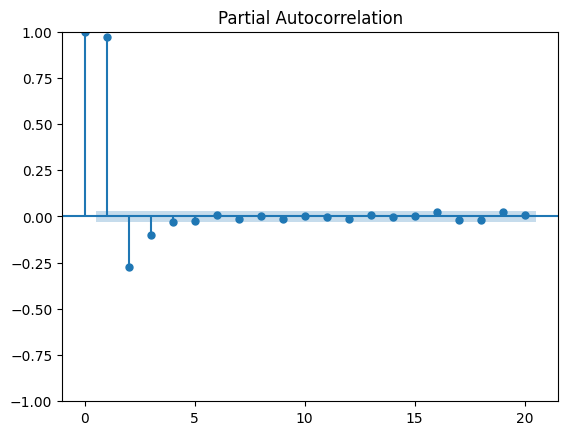

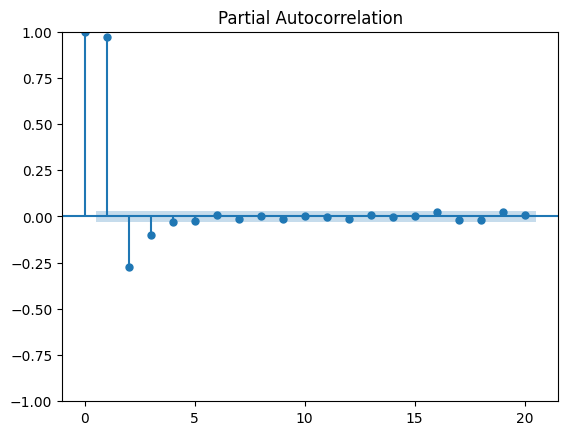

In [ ]:
plot_pacf((dff['WVHT(m)']).dropna(),lags=20)

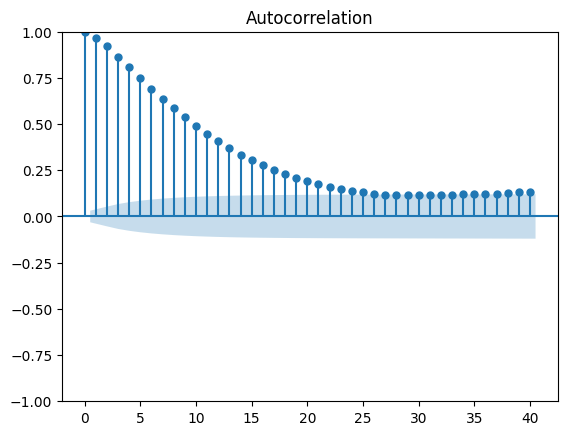

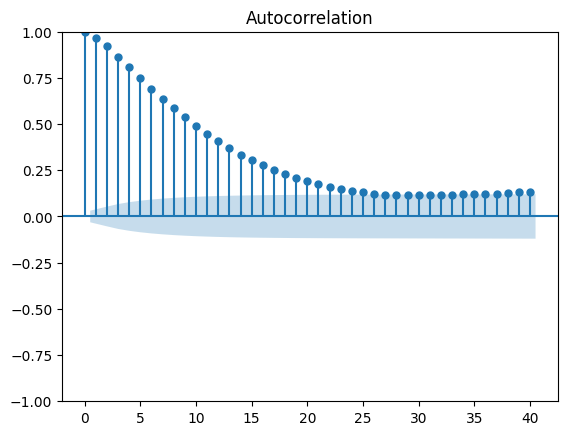

In [ ]:
plot_acf((dff['WVHT(m)']).dropna(),lags=40)

In [ ]:
p=24   #ACF
q=3   #PCF

In [ ]:
train=dff['WVHT(m)'].values[:3000]
test=dff['WVHT(m)'].values[3000:]

In [ ]:
# To install the library
!pip install pmdarima
# Import the library
from pmdarima import auto_arima

In [ ]:
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(dff['WVHT(m)'], start_p = 1, start_q = 3,
                          max_p = 24, max_q = 3, m = 3,
                          start_P = 0, seasonal = False,
                          d = None, D = 0, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7672.342, Time=16.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7397.557, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7656.245, Time=0.88 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7612.253, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7399.557, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7672.862, Time=3.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7667.443, Time=2.81 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7674.054, Time=4.87 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7672.844, Time=4.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7702.140, Time=8.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7673.741, Time=2.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-7669.805, Time=5.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7685.186, Time=10.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-7671.738, Time=1.59 sec
 ARIMA(3,1,3)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3886
Model:               SARIMAX(5, 1, 3)   Log Likelihood                3886.764
Date:                Thu, 30 Mar 2023   AIC                          -7753.529
Time:                        06:27:25   BIC                          -7690.880
Sample:                             0   HQIC                         -7731.289
                               - 3886                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.694e-05      0.000     -0.437      0.662      -0.000       0.000
ar.L1          0.0003      0.289      0.001      0.999      -0.567       0.567
ar.L2          0.7823      0.177      4.409      0.000       0.435       1.130
ar.L3          0.3449      0.306      1.128      0.260      -0.255       0.944
ar.L4         -0.2050      0.083     -2.457      0.014      -0.369      -0.041
ar.L5         -0.0768      0.025     -3.102      0.002      -0.125      -0.028
ma.L1          0.2566      0.289      0.887      0.375      -0.310       0.823
ma.L2         -0.6625      0.145     -4.565      0.000      -0.947      -0.378
ma.L3         -0.5230      0.281     -1.862      0.063      -1.074       0.027
sigma2         0.0078    8.4e-05     92.917      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   7.83   Jarque-Bera (JB):             14576.48
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(train, order=(p, 0, q))
result = model.fit()
#result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels')

In [ ]:
range=np.array(df['Date'][3000:])
data=predictions
ts = pd.Series(data, index=range)

In [ ]:
dff=dff[['Date','WVHT(m)']].set_index('Date')
dff

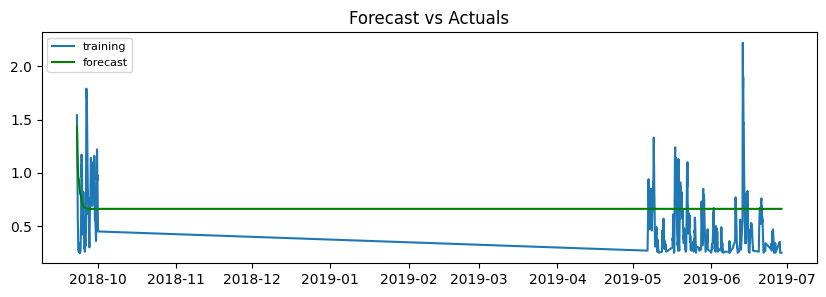

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(dff[3000:], label='training')
plt.plot(ts, label='forecast',color='g')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

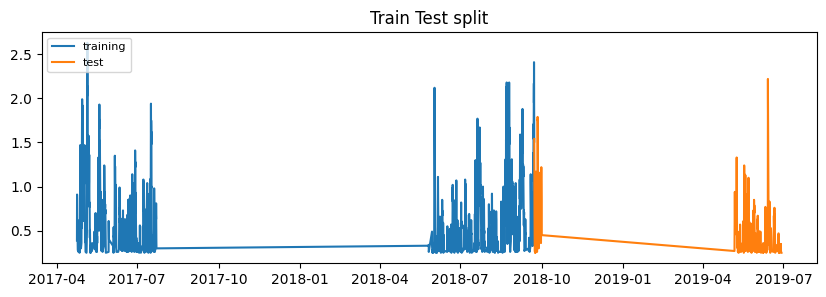

In [ ]:
plt.figure(figsize=(10,3), dpi=100)
plt.plot(dff[:3000], label='training')
plt.plot(dff[3000:], label='test')
plt.title('Train Test split')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3886 non-null   int64  
 1   #YY         3886 non-null   int64  
 2   MM          3886 non-null   int64  
 3   DD          3886 non-null   int64  
 4   hh          3886 non-null   int64  
 5   mm          3886 non-null   int64  
 6   WDIR(degT)  3886 non-null   int64  
 7   WSPD(m/s)   3886 non-null   float64
 8   GST(m/s)    3886 non-null   float64
 9   DPD(sec)    3886 non-null   float64
 10  APD(sec)    3886 non-null   float64
 11  MWD(degT)   3886 non-null   int64  
 12  PRES(hPa)   3886 non-null   float64
 13  ATMP(degC)  3886 non-null   float64
 14  WTMP(degC)  3886 non-null   float64
 15  DEWP(degC)  3886 non-null   float64
 16  WVHT(m)     3886 non-null   float64
dtypes: float64(9), int64(8)
memory usage: 516.2 KB


In [ ]:
df.describe()

ID          #YY           MM           DD           hh  \
count  3.886000e+03  3886.000000  3886.000000  3886.000000  3886.000000   
mean   9.684491e+09  2017.855378     6.586207    16.546320    11.553011   
std    9.195449e+09     0.692806     1.412267     8.653715     6.715559   
min    2.017510e+08  2017.000000     4.000000     1.000000     0.000000   
25%    2.017781e+09  2017.000000     5.000000     9.000000     6.000000   
50%    2.019519e+09  2018.000000     6.000000    18.000000    12.000000   
75%    2.018626e+10  2018.000000     8.000000    24.000000    17.000000   
max    2.019628e+10  2019.000000     9.000000    31.000000    23.000000   

                mm   WDIR(degT)    WSPD(m/s)     GST(m/s)     DPD(sec)  \
count  3886.000000  3886.000000  3886.000000  3886.000000  3886.000000   
mean     48.215646   163.051981     5.737751     6.851595     4.205031   
std       3.826793   113.305082     2.385708     2.849304     1.031086   
min      40.000000     1.000000     0.000000     0.200000     2.150000   
25%      50.000000    53.000000     4.000000     4.800000     3.450000   
50%      50.000000   166.500000     5.600000     6.600000     4.000000   
75%      50.000000   257.000000     7.300000     8.675000     4.760000   
max      50.000000   360.000000    13.500000    16.800000    17.390000   

          APD(sec)    MWD(degT)    PRES(hPa)   ATMP(degC)   WTMP(degC)  \
count  3886.000000  3886.000000  3886.000000  3886.000000  3886.000000   
mean      3.528513   137.047607  1014.233479    15.294519    14.845239   
std       0.584589   109.104411     5.732770     6.410222     7.357890   
min       2.290000     0.000000   992.100000     3.400000     3.500000   
25%       3.080000    33.000000  1010.700000     9.000000     6.800000   
50%       3.440000   138.000000  1014.200000    17.100000    16.900000   
75%       3.890000   192.000000  1018.000000    20.900000    21.800000   
max       5.770000   360.000000  1030.600000    27.500000    25.300000   

        DEWP(degC)      WVHT(m)  
count  3886.000000  3886.000000  
mean     12.578410     0.641372  
std       6.064549     0.372959  
min      -4.000000     0.250000  
25%       7.525000     0.360000  
50%      13.500000     0.520000  
75%      17.800000     0.810000  
max      23.200000     2.630000

In [ ]:
def func(df):
      date_string=str(int(df['#YY']))+'-'+str(int(df['MM']))+'-'+str(int(df['DD']))+' '+str(int(df['hh']))+':'+str(int(df['mm']))
      date_object = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
      return date_object

df['Date']=df.apply(lambda x:func(x) ,axis=1)      

Text(0, 0.5, 'Wave Height')

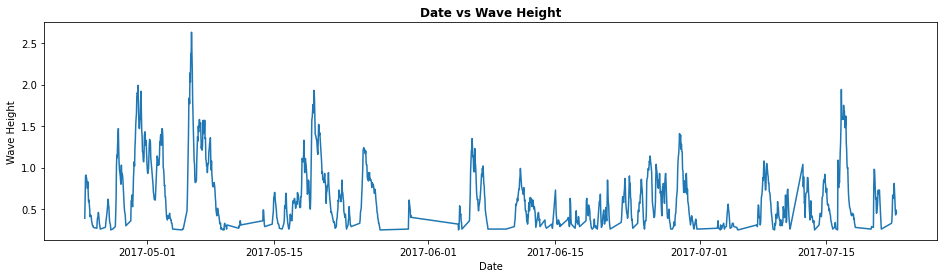

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'].iloc[:1250], df['WVHT(m)'].iloc[:1250])
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

Text(0, 0.5, 'Wave Height')

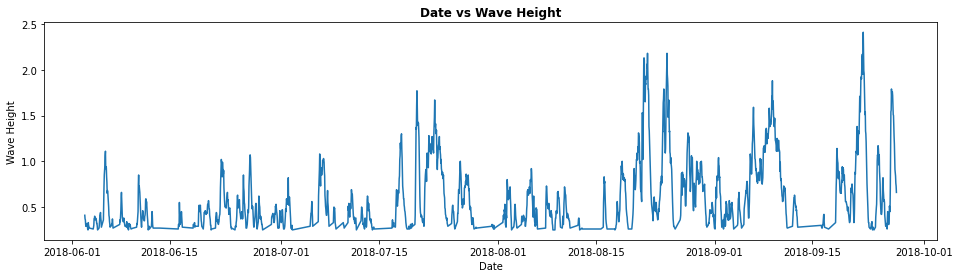

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'].iloc[1300:3100], df['WVHT(m)'].iloc[1300:3100])
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

Text(0, 0.5, 'Wave Height')

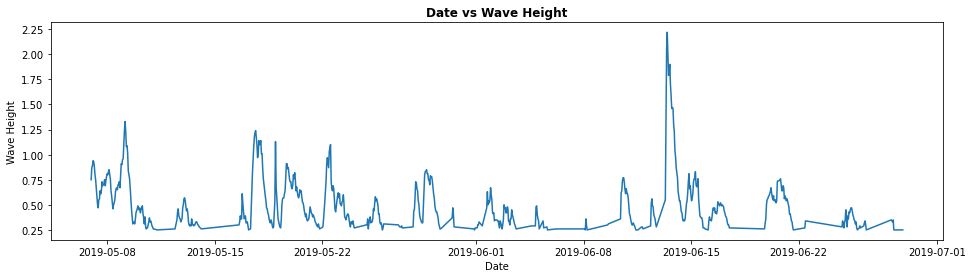

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'].iloc[3200:], df['WVHT(m)'].iloc[3200:])
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

Text(0, 0.5, 'Wave Height')

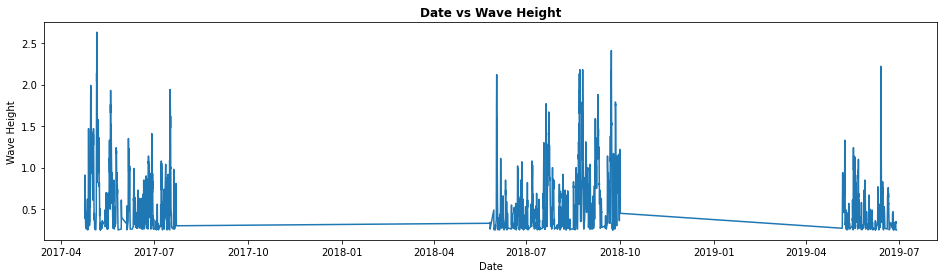

In [ ]:
plt.figure(figsize =(16, 4))
plt.plot(df['Date'], df['WVHT(m)'])
plt.title('Date vs Wave Height', fontweight="bold")
plt.xlabel('Date')
plt.ylabel('Wave Height')

In [ ]:
corr_=df.corr()

In [ ]:
corr_

ID       #YY        MM        DD        hh        mm  \
ID          1.000000  0.007537 -0.057642  0.429962  0.615945 -0.027720   
#YY         0.007537  1.000000  0.089301 -0.013093 -0.006706 -0.767845   
MM         -0.057642  0.089301  1.000000 -0.060247 -0.007213  0.384580   
DD          0.429962 -0.013093 -0.060247  1.000000 -0.019325  0.027773   
hh          0.615945 -0.006706 -0.007213 -0.019325  1.000000  0.007097   
mm         -0.027720 -0.767845  0.384580  0.027773  0.007097  1.000000   
WDIR(degT)  0.070105  0.022797 -0.046900  0.123331  0.009239 -0.107809   
WSPD(m/s)  -0.038268 -0.112935  0.168654  0.061848 -0.041710  0.180145   
GST(m/s)   -0.040253 -0.091289  0.189825  0.072226 -0.046681  0.166216   
DPD(sec)   -0.029757 -0.103989  0.023936  0.043274 -0.007235  0.080920   
APD(sec)   -0.037773 -0.165792  0.055748  0.050137 -0.011667  0.156808   
MWD(degT)   0.082592  0.076234 -0.061130  0.142248  0.014815 -0.176513   
PRES(hPa)  -0.101535  0.110130  0.387806 -0.133488 -0.002354  0.093902   
ATMP(degC)  0.025777 -0.149187  0.756070  0.055549  0.001455  0.565925   
WTMP(degC)  0.034826 -0.135193  0.851339  0.093276  0.010371  0.598926   
DEWP(degC)  0.038752 -0.141293  0.625120  0.035930 -0.009992  0.496559   
WVHT(m)    -0.027836 -0.135838  0.105168  0.056486 -0.005297  0.152288   

            WDIR(degT)  WSPD(m/s)  GST(m/s)  DPD(sec)  APD(sec)  MWD(degT)  \
ID            0.070105  -0.038268 -0.040253 -0.029757 -0.037773   0.082592   
#YY           0.022797  -0.112935 -0.091289 -0.103989 -0.165792   0.076234   
MM           -0.046900   0.168654  0.189825  0.023936  0.055748  -0.061130   
DD            0.123331   0.061848  0.072226  0.043274  0.050137   0.142248   
hh            0.009239  -0.041710 -0.046681 -0.007235 -0.011667   0.014815   
mm           -0.107809   0.180145  0.166216  0.080920  0.156808  -0.176513   
WDIR(degT)    1.000000  -0.080887 -0.070849 -0.052099 -0.055171   0.400040   
WSPD(m/s)    -0.080887   1.000000  0.986938  0.265773  0.342741  -0.074604   
GST(m/s)     -0.070849   0.986938  1.000000  0.282885  0.362590  -0.065117   
DPD(sec)     -0.052099   0.265773  0.282885  1.000000  0.908203  -0.191378   
APD(sec)     -0.055171   0.342741  0.362590  0.908203  1.000000  -0.200644   
MWD(degT)     0.400040  -0.074604 -0.065117 -0.191378 -0.200644   1.000000   
PRES(hPa)    -0.158441  -0.102649 -0.084490  0.090682  0.090726  -0.142733   
ATMP(degC)   -0.020251   0.110911  0.105744 -0.163948 -0.138025  -0.026456   
WTMP(degC)   -0.037577   0.129435  0.136223 -0.037411 -0.001819  -0.065393   
DEWP(degC)   -0.033285   0.066140  0.050991 -0.232985 -0.218562  -0.023773   
WVHT(m)      -0.072296   0.676804  0.691531  0.735568  0.854101  -0.164750   

            PRES(hPa)  ATMP(degC)  WTMP(degC)  DEWP(degC)   WVHT(m)  
ID          -0.101535    0.025777    0.034826    0.038752 -0.027836  
#YY          0.110130   -0.149187   -0.135193   -0.141293 -0.135838  
MM           0.387806    0.756070    0.851339    0.625120  0.105168  
DD          -0.133488    0.055549    0.093276    0.035930  0.056486  
hh          -0.002354    0.001455    0.010371   -0.009992 -0.005297  
mm           0.093902    0.565925    0.598926    0.496559  0.152288  
WDIR(degT)  -0.158441   -0.020251   -0.037577   -0.033285 -0.072296  
WSPD(m/s)   -0.102649    0.110911    0.129435    0.066140  0.676804  
GST(m/s)    -0.084490    0.105744    0.136223    0.050991  0.691531  
DPD(sec)     0.090682   -0.163948   -0.037411   -0.232985  0.735568  
APD(sec)     0.090726   -0.138025   -0.001819   -0.218562  0.854101  
MWD(degT)   -0.142733   -0.026456   -0.065393   -0.023773 -0.164750  
PRES(hPa)    1.000000    0.145336    0.286754   -0.015896 -0.000905  
ATMP(degC)   0.145336    1.000000    0.952580    0.939676 -0.071976  
WTMP(degC)   0.286754    0.952580    1.000000    0.850205  0.033039  
DEWP(degC)  -0.015896    0.939676    0.850205    1.000000 -0.141361  
WVHT(m)     -0.000905   -0.071976    0.033039   -0.141361  1.000000

<Axes: >

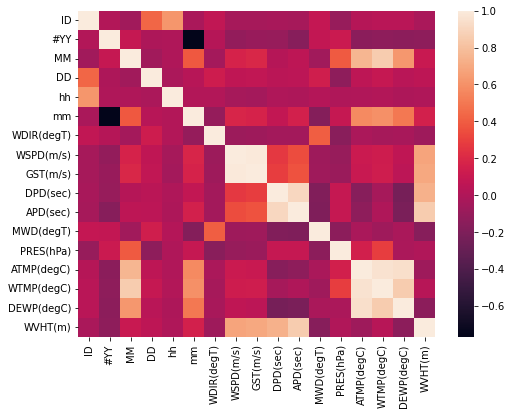

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_)

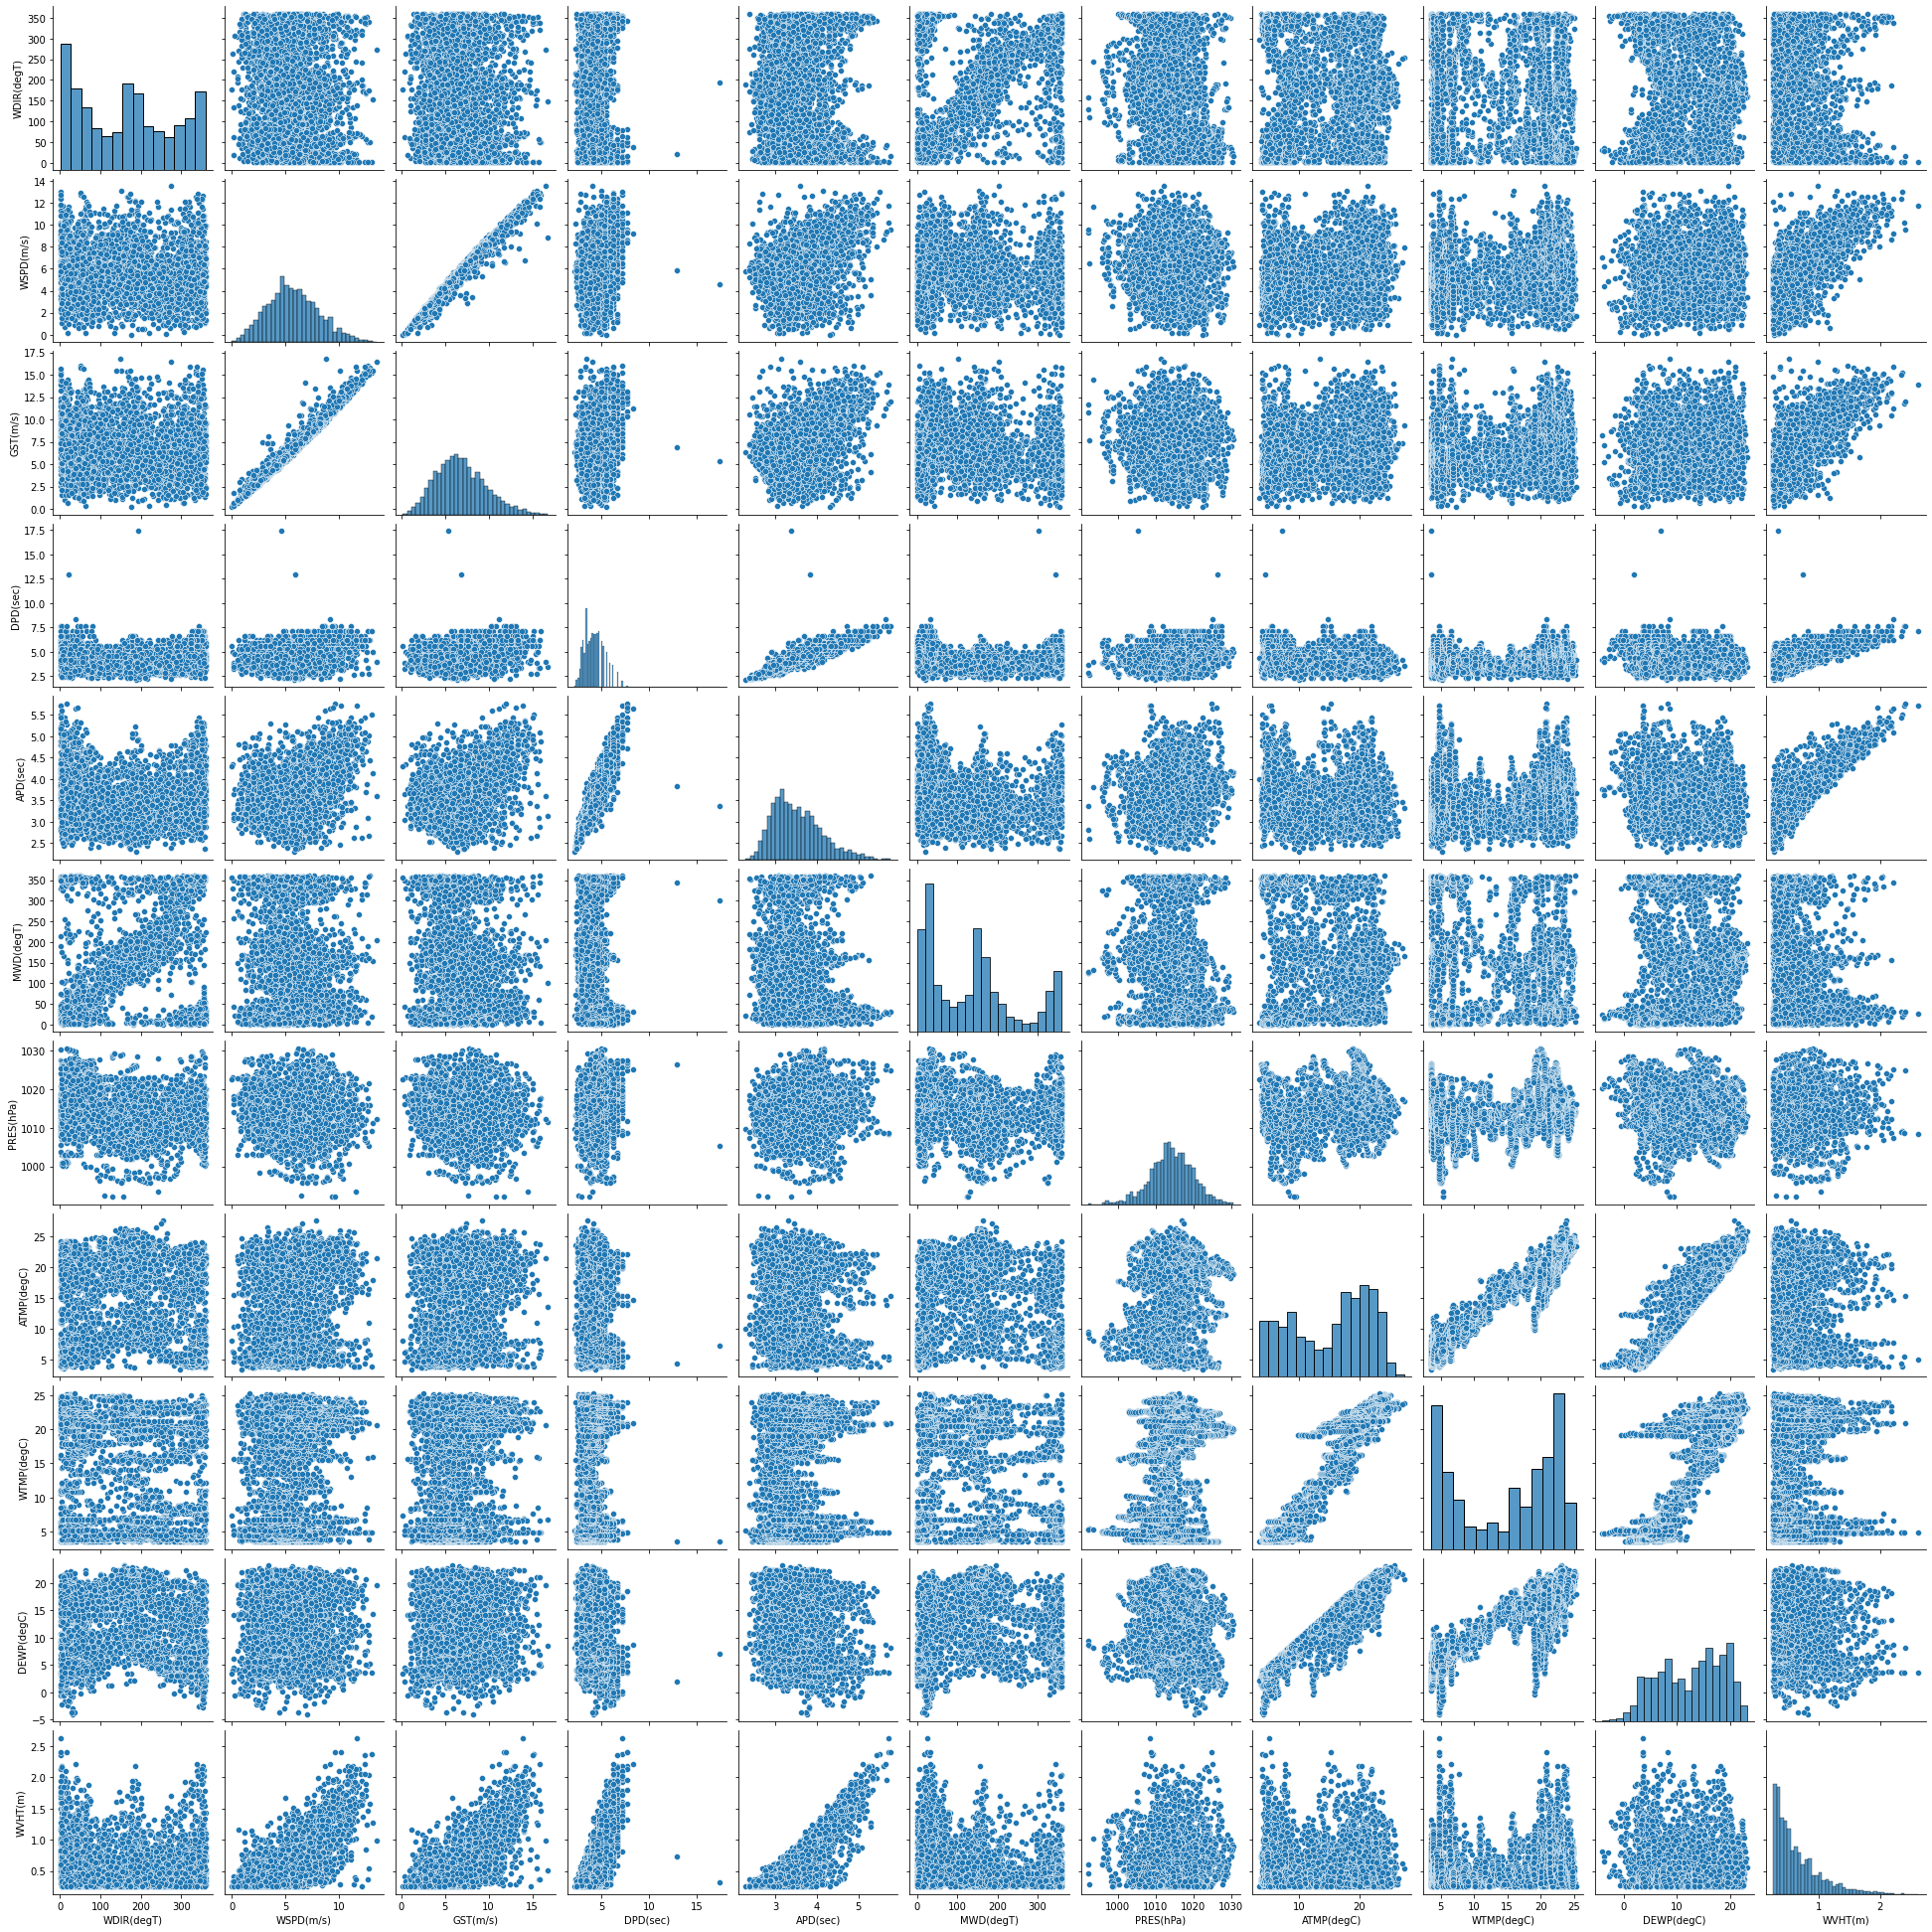

In [ ]:
sns.pairplot(df[only])

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
only=['WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']
vif = pd.DataFrame()
vif["variables"] = only[:-1]
vif["VIF"]=[variance_inflation_factor(df[only[:-1]].values, i) for i in range(df[only[:-1]].shape[1])]
vif=vif.sort_values(by = 'VIF', ascending = False)
vif

variables         VIF
2    GST(m/s)  285.117771
1   WSPD(m/s)  281.739708
4    APD(sec)  238.848507
7  ATMP(degC)  227.154939
3    DPD(sec)  102.727049
8  WTMP(degC)   80.130395
6   PRES(hPa)   79.118515
9  DEWP(degC)   57.405548
0  WDIR(degT)    3.691799
5   MWD(degT)    3.226752

In [ ]:
cols=['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR(degT)', 'WSPD(m/s)',
       'GST(m/s)', 'DPD(sec)', 'APD(sec)', 'MWD(degT)', 'PRES(hPa)',
       'ATMP(degC)', 'WTMP(degC)', 'DEWP(degC)', 'WVHT(m)']
vif = pd.DataFrame()
vif["variables"] = cols[1:-1]
vif["VIF"]=[variance_inflation_factor(df[cols[1:-1]].values, i) for i in range(df[cols[1:-1]].shape[1])]
vif=vif.sort_values(by = 'VIF', ascending = False)
vif

variables         VIF
10   PRES(hPa)  446.839992
3           mm  309.735792
6     GST(m/s)  294.008282
5    WSPD(m/s)  289.355522
8     APD(sec)  248.509150
11  ATMP(degC)  235.257602
12  WTMP(degC)  145.552113
0           MM  129.678949
7     DPD(sec)  104.458963
13  DEWP(degC)   58.472303
1           DD    5.694619
2           hh    3.993507
4   WDIR(degT)    3.720833
9    MWD(degT)    3.315839

# Train Individual Model

## 1.LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

def lstm_model(x_data, y_data, num_epochs=20, batch_size=32, learning_rate=0.001):
    # Creating the model
    model = Sequential()
    # Adding the first layer
    model.add(LSTM(32, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    # Adding the second layer 
    model.add(LSTM(16, return_sequences=True))
    # Adding a dropout value in order to prevent overfiting
    model.add(Dropout(0.2))
    # Adding the third layer
    model.add(LSTM(10))
    # Adding the output layer. 6 nodes are selected because the data has 6 features
    model.add(Dense(6))
    
    # Choosing the optimizer
    optimizer = Adam(lr=learning_rate)
    
    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    # Fitting the model
    history = model.fit(x_data, y_data, validation_split=0.25, epochs=num_epochs, batch_size=batch_size)
    
    return model, history

In [ ]:
lstm_model

## 2. TAB Transformer

In [ ]:
!pip install pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor,TabNetClassifier

In [ ]:
tab = TabNetRegressor()  #TabNetRegressor()
tab.fit(xtrain_.values,ytrain_.values.reshape(-1,1),
        eval_set=[(xtest_.values,ytest_.values.reshape(-1,1))],
        max_epochs=2000,
        patience=300)
ypred=tab.predict(xtest_.values)
rmse=np.sqrt(mean_squared_error(ytest_,ypred))
print(rmse)

In [ ]:
ypred4=tab.predict(df_test[cols[:-1]].values)

In [ ]:
tab = TabNetRegressor()  #TabNetRegressor()
scores = cross_val_score(tab,x_.values,y_.values.reshape(-1, 1), cv=5, scoring='neg_mean_squared_error')
print(f'{tab.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(scores))):.4f}')

# ML Models

In [ ]:
# Create model object and fit the model

#model = XGBRegressor()
#model=GradientBoostingRegressor()
model=RandomForestRegressor()

# Evaluate the model
scores = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')
print(f'{model.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(scores))):.4f}')

RandomForestRegressor: rmse= 0.1043


In [ ]:
model.fit(x,y)

In [ ]:
def Impp(model,lst):
    imp=list(model.feature_importances_.round(4))
    tp=pd.DataFrame(np.array([lst[:-1],imp]).T,columns=['Columns','Imp'])
    tp=tp.sort_values(by = 'Imp', ascending = False)
    print(tp)

In [ ]:
Impp(model,only)

      Columns     Imp
4    APD(sec)  0.7344
2    GST(m/s)  0.1292
1   WSPD(m/s)  0.0887
6   PRES(hPa)  0.0107
5   MWD(degT)  0.0088
0  WDIR(degT)  0.0066
9  DEWP(degC)  0.0064
8  WTMP(degC)  0.0056
7  ATMP(degC)  0.0054
3    DPD(sec)  0.0043


In [ ]:
model3 = XGBRegressor()
model3.fit(x,y)
Impp(model3,only)

      Columns     Imp
4    APD(sec)  0.6573
2    GST(m/s)   0.195
1   WSPD(m/s)  0.0964
6   PRES(hPa)  0.0104
5   MWD(degT)  0.0088
8  WTMP(degC)  0.0084
9  DEWP(degC)  0.0068
7  ATMP(degC)  0.0065
3    DPD(sec)  0.0063
0  WDIR(degT)  0.0042


In [ ]:
model2=RandomForestRegressor()
model2.fit(x_,y_)
Impp(model2,cols)

       Columns     Imp
9     APD(sec)  0.7329
7     GST(m/s)  0.1346
6    WSPD(m/s)   0.082
11   PRES(hPa)   0.009
10   MWD(degT)  0.0069
5   WDIR(degT)  0.0053
2           DD  0.0052
3           hh  0.0048
14  DEWP(degC)  0.0048
12  ATMP(degC)  0.0042
13  WTMP(degC)  0.0041
8     DPD(sec)  0.0035
1           MM  0.0016
0          #YY  0.0008
4           mm  0.0003


In [ ]:
model4 = XGBRegressor()
model4.fit(x_,y_)
Impp(model4,cols)

       Columns     Imp
9     APD(sec)  0.6472
7     GST(m/s)  0.1516
6    WSPD(m/s)  0.1172
4           mm  0.0246
11   PRES(hPa)  0.0084
10   MWD(degT)  0.0075
13  WTMP(degC)   0.007
1           MM  0.0063
14  DEWP(degC)  0.0058
12  ATMP(degC)  0.0045
2           DD  0.0044
8     DPD(sec)  0.0043
5   WDIR(degT)  0.0041
3           hh  0.0038
0          #YY  0.0032


# Tune Particular Parameters/Model

In [ ]:
model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {'learning_rate': [0.02, 0.01,0.005],
              'n_estimators': [80,100,200],
              'max_depth': [3, 4, 5],
              'max_features' : list(range(8,x_.shape[1]))}


# Define the GridSearchCV object
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

gs.fit(x_,y_)
# Print the best hyperparameters
print(gs.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
{'learning_rate': 0.02, 'max_depth': 4, 'max_features': 14, 'n_estimators': 200}


In [ ]:
model2 = LGBMRegressor()
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [20, 30, 50],
    'reg_alpha': [0, 1e-1, 1, 2],
    'reg_lambda': [0, 1e-1, 1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

lgbm = LGBMRegressor()
gs2 = GridSearchCV(lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
gs2.fit(x_,y_)
print(gs2.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 31, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
gs3 = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
gs3.fit(x_, y_)
print(gs3.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create the ExtraTreesRegressor object
et = ExtraTreesRegressor()

# Create the GridSearchCV object
gs4 = GridSearchCV(et, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gs4.fit(x_, y_)
print(gs4.best_params_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
}

xgb = XGBRegressor()

# Create the GridSearchCV object
gs5 = GridSearchCV(xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gs5.fit(x_, y_)
print(gs5.best_params_)

In [ ]:
#learning_rates = [0.25, 0.1, 0.07,0.05, 0.025]            # best=0.1
#n_estimators = [64, 100,150,175 ,200]                      # best=100
#max_depths = np.linspace(1, 32, 32, endpoint=True)         # best= 3
#min_samples_splits = np.linspace(2, 7, 3, endpoint=True)
max_features = list(range(1,x_.shape[1]))
min_samples_leafs =[0.05,0.08,0.1,0.2]

for eta in min_samples_leafs:
    model = GradientBoostingRegressor(min_samples_leaf = eta)
    scores = cross_val_score(model,x_,y_, cv=5, scoring='neg_mean_squared_error')
    print(f'{model.__class__.__name__}: parameter= {eta}    rmse= {np.mean(np.sqrt(np.abs(scores))):.4f}')

GradientBoostingRegressor: parameter= 0.05    rmse= 0.1142
GradientBoostingRegressor: parameter= 0.08    rmse= 0.1247
GradientBoostingRegressor: parameter= 0.1    rmse= 0.1314
GradientBoostingRegressor: parameter= 0.2    rmse= 0.1594


# Ensemble

### 1.Voting

In [ ]:
r1=CatBoostRegressor(loss_function='RMSE',verbose=0,depth=6,iterations=312,
            l2_leaf_reg=0.1, learning_rate=0.029867173952780164,random_strength=0.1)

r2=LGBMRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 4, min_child_samples= 20,
                          n_estimators= 100, num_leaves= 31, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.8)

r3=ExtraTreesRegressor(bootstrap= False, max_depth= 10, max_features= 'auto', 
                                min_samples_leaf= 1, min_samples_split= 6, n_estimators= 300)

r4=GradientBoostingRegressor(learning_rate= 0.02, max_depth= 4, max_features= 14, n_estimators= 200)

r5=XGBRegressor(colsample_bytree=0.9574863876554921, learning_rate=0.01,max_depth=6,n_estimators=499,subsample=0.1)

r6=RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= 'auto', 
                                  min_samples_leaf= 4, min_samples_split= 4, n_estimators= 100)

In [ ]:
model = VotingRegressor([('CatGB', r1), ('LGBM', r2), ('ET', r3)])     #BEST MODEL TILL NOW
scores = cross_val_score(model,x,y, cv=5, scoring='neg_mean_squared_error')                 #works better on (x,y)=0.0997, (x_,y_) gives 0.0.999
print(f'{model.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(scores))):.4f}')

VotingRegressor: rmse= 0.0997


In [ ]:
model2 = VotingRegressor([('CatGB', r1), ('LGBM', r2),('ET', r3),('GBM',r4)])
scores2 = cross_val_score(model2,x,y, cv=5, scoring='neg_mean_squared_error')
print(f'{model2.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(scores2))):.4f}')

VotingRegressor: rmse= 0.1001


In [ ]:
model3 = VotingRegressor([('CatGB', r1), ('LGBM', r2),('ET', r3),('RF',r6)])
scores3 = cross_val_score(model3,x,y, cv=5, scoring='neg_mean_squared_error')
print(f'{model3.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(scores3))):.4f}')

VotingRegressor: rmse= 0.1000


In [ ]:
model = VotingRegressor([('CatGB', r1), ('LGBM', r2), ('ET', r3)])      #(x_,y_) works better than (x,y) on real test data 
model.fit(x_,y_)
ypred=model.predict(df_test[cols[:-1]])

### 2.Stacking

In [ ]:
m1=CatBoostRegressor(loss_function='RMSE',verbose=0,depth=6,iterations=312,
            l2_leaf_reg=0.1, learning_rate=0.029867173952780164,random_strength=0.1)

m2=LGBMRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 4, min_child_samples= 20,
                          n_estimators= 100, num_leaves= 31, reg_alpha= 0.1, reg_lambda= 1, subsample= 0.8)

m3=ExtraTreesRegressor(bootstrap= False, max_depth= 10, max_features= 'auto', 
                                min_samples_leaf= 1, min_samples_split= 6, n_estimators= 300)

m4=GradientBoostingRegressor(learning_rate= 0.02, max_depth= 4, max_features= 14, n_estimators= 200)

m5=XGBRegressor(colsample_bytree=0.9574863876554921, learning_rate=0.01,max_depth=6,n_estimators=499,subsample=0.1)

m6=RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= 'auto', 
                                  min_samples_leaf= 4, min_samples_split= 4, n_estimators= 100)

In [ ]:
estimators = [('ET',m3),('LGBM',m2)]

stk= StackingRegressor(
     estimators=estimators,
     final_estimator=m1)

score = cross_val_score(stk,x,y, cv=5, scoring='neg_mean_squared_error')
print(f'{stk.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(score))):.4f}')

StackingRegressor: rmse= 0.1039


In [ ]:
estimators = [('LGBM',m2),('CAT',m1)]

stk= StackingRegressor(
     estimators=estimators,
     final_estimator=m3)

score = cross_val_score(stk,x,y, cv=5, scoring='neg_mean_squared_error')
print(f'{stk.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(score))):.4f}')

StackingRegressor: rmse= 0.1043


## Fit Predict

In [ ]:
r1=CatBoostRegressor(loss_function='RMSE',verbose=0,depth=6,iterations=312,
            l2_leaf_reg=0.1, learning_rate=0.029867173952780164,random_strength=0.1)

score = cross_val_score(r1,x_,y_, cv=5, scoring='neg_mean_squared_error')
print(f'{stk.__class__.__name__}: rmse= {np.mean(np.sqrt(np.abs(score))):.4f}')

StackingRegressor: rmse= 0.1006


In [ ]:
r1.fit(xtrain_,ytrain_)
r1.score(xtest_,ytest_)

0.9351780594564357

In [ ]:
r2.fit(xtrain_,ytrain_)
r2.score(xtest_,ytest_)

0.9309385865419579

In [ ]:
r3.fit(xtrain_,ytrain_)
r3.score(xtest_,ytest_)

0.9323556471966308

In [ ]:
r4.fit(xtrain_,ytrain_)
r4.score(xtest_,ytest_)

0.9252413876073615

In [ ]:
r5.fit(xtrain_,ytrain_)
r5.score(xtest_,ytest_)

0.9327219780096505

In [ ]:
r6.fit(xtrain_,ytrain_)
r6.score(xtest_,ytest_)

0.9326280911946992

In [ ]:
model = VotingRegressor([('CatGB', r1), ('LGBM', r2), ('ET', r3)])  
model.fit(xtrain_,ytrain_)
model.score(xtest_,ytest_)

0.9344792453432225

#Save File

In [ ]:
def form_csv(df_test,y_pred):
    s=pd.Series(y_pred,name='WVHT(m)')
    dff=pd.concat([df_test['ID'],s],axis=1).set_index('ID')
    dff.to_csv('submit4.csv')  

In [ ]:
form_csv(df_test,ypred.reshape(-1))  